## CAPSTONE PROJECT

### TOPIC - PREDICTING LOAN DEFAULT RISK

#### The Challenge: Navigating Loan Risk
Financial institutions face significant challenges in accurately assessing loan default risk. Traditional methods often fall short in today's complex financial landscape.

#### Problem Statement:
Develop a robust machine learning pipeline to predict loan default risk, enabling better credit decisions and minimizing financial losses.

### Problem Type:
This is a **classification problem** focused on predicting loan default risk. The target variable good_bad_flag indicates whether a loan was repaid (1) or defaulted (0).

#### Our Aim:
Utilize customer behavioral and financial data to build a predictive model, enhancing accuracy and efficiency in risk assessment.

### Dataset Sources:
 - Data 1: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv
 - Data 2: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv
 - Data 3: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv<!--  -->


# DATA COLLECTION
After downloading , we have the the following dataset below that will be used in the course of the project

In [70]:
# Dataset to be used
url1 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv"
url2 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv"
url3 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv"

In [71]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,time,date
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATASET

#### Performance Dataset

In [72]:
#Read the performance dataset.
perf = pd.read_csv(url1)

In [73]:
# checking the dataset
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


### Demographic Dataset

In [74]:
demo = pd.read_csv(url2)

In [75]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


### Previous Loan Dataset(Historical Loan)

In [76]:
prevloan = pd.read_csv(url3)

In [77]:
prevloan.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


# DATA UNDERSTANDING

To tackle the challenge of predicting loan default risk, we need to understand the dataset, which brings together customers' demographic, financial(current), and behavioral data across both current and past loans. By exploring these features, we uncover the story behind each customers who they are, how they have  managed credit before, and what signals might point to future default risk.

## Data Features:

| Category      | Features                                                                 |
|---------------|--------------------------------------------------------------------------|
| **Performance** | customerid, systemloanid, loannumber, approveddate, creationdate, loanamount, totaldue, termdays, referredby, good_bad_flag                |
| **Demographics**    | customerid, birthdate, bank_account_type, longitude_gps, latitude_gps, bank_name_clients, bank_branch_clients, employment_status_clients, level_of_education_clients |
| **Previous Loan**   |  customerid, systemloanid, loannumber, approveddate, creationdate, loanamount, totaldue, termdays, closeddate, referredby, firstduedate, firstrepaiddate  |
| **Target**       | Loan Default (0: Bad, 1: Good)                                            |


## Feature Definitions:

### Performance(Current Loan)
- **customerid** — Unique ID assigned to each borrower.
- **systemloanid** — Unique ID assigned to each loan in the system.
- **loannumber** — Sequential number indicating the loan count for a borrower.
- **approveddate** — Date when the loan was approved.
- **creationdate** — Date the loan record was created in the system.
- **loanamount** — Principal amount approved.
- **totaldue** — Total amount due (principal + interest + fees).
- **termdays** — Loan term length in days.
- **referredby** — Referrer ID or source through which the borrower came.
- **good_bad_flag** — Historical repayment outcome indicator.

### Demographics
- **customerid** — Borrower unique identifier (same as above).
- **birthdate** — Borrower’s date of birth (used to calculate age).
- **bank_account_type** — Type of bank account (e.g., savings, checking).
- **longitude_gps** — Longitude coordinate of borrower’s location.
- **latitude_gps** — Latitude coordinate of borrower’s location.
- **bank_name_clients** — Borrower’s bank name.
- **bank_branch_clients** — Specific bank branch of the borrower.
- **employment_status_clients** — Borrower’s employment status (e.g., employed, unemployed).
- **level_of_education_clients** — Highest education level attained by the borrower.

### Previous Loan
- **customerid** — Borrower unique identifier.
- **systemloanid** — Previous loan ID in the system.
- **loannumber** — Loan sequence number for previous loans.
- **approveddate** — Approval date for the previous loan.
- **creationdate** — Creation date for the previous loan record.
- **loanamount** — Approved amount for the previous loan.
- **totaldue** — Total amount due for the previous loan.
- **termdays** — Loan term in days for the previous loan.
- **closeddate** — Date when the loan was closed or settled.
- **referredby** — Referrer ID or source for the previous loan.
- **firstduedate** — Date of the first scheduled payment.
- **firstrepaiddate** — Date of the first actual repayment.

### Target
- **Good_Bad_Flag** — Binary target: `0` = Bad (defaulted), `1` = Good (did not default).

Our target column is found in the customer performance dataset. This means the customer performance dataset will also serve as our target dataset. 

# DATA CLEANING

The next step will be for me to clean these datasets so that I can work with it for my prediction. I will clean the dataset individually so that errors do not carryover when I merge. This will also make feature creation much easier.

#### Cleaning the Performance Dataset(current loans)

In [78]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [79]:
perf.shape

(4368, 10)

In [80]:
# checking the summary of the dataset
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


From the dataset summary, we observed the following:
- 'approveddate' and 'creationdate' have the wrong datatype(object)
- 'referredby has alot of missing values

Regarding these observations,we will do the following:
- convert 'approveddate' and 'creationdate' to the appropraite datatypes(datetime)
- Deal with the missiing values ( drop the column- This depends on the Null percentage or fill it)

In [81]:
# convert the necessary columns to datetime
date_cols = ['approveddate', 'creationdate']
for col in date_cols:
    perf[col] = pd.to_datetime(perf[col])

In [82]:
perf['approveddate'].dtypes

dtype('<M8[ns]')

In [83]:
perf['creationdate'].dtypes

dtype('<M8[ns]')

In [84]:
# Dealing with missing values
perf.isna().sum().sort_values(ascending=False)

referredby       3781
customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag       0
dtype: int64

In [85]:
#check the percentage of missing values
(perf.isna().sum().sort_values(ascending=False)/len(perf)*100).round(1)

referredby       86.6
customerid        0.0
systemloanid      0.0
loannumber        0.0
approveddate      0.0
creationdate      0.0
loanamount        0.0
totaldue          0.0
termdays          0.0
good_bad_flag     0.0
dtype: float64

After checking for the percentage of missing values, the 'referred by' column has the highest percentage(86.5%). The high level of missing value suggests that the column is insignificant for the analysis . Hence it will be dropped.

In [86]:
perf.drop('referredby',axis=1,inplace=True)

In [87]:
# check again for missing values
perf.isna().sum().sort_values(ascending=False)

customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
good_bad_flag    0
dtype: int64

In [88]:
# checking if the primary key(customerid) is unique
perf['customerid'].nunique()

4368

In [89]:
# checking for duplicates
perf['customerid'].duplicated().sum()

0

In [90]:
# check data summary again
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.3+ KB


Before I move to the cleaning the demoraphic dataset , I will create some features in the performance dataset that will help in driving predictive power in assessing default risk. The features are :

- **Interest Amount** - The total cost of borrowing and it is  calculated as what you owe in total minus the original loan.
> ***Totaldue - loan amount***
- **Repayment Burden** - it shows how much you need to pay each day to cover the loan plus its interest. 
> ***totaldue / termsdays***
- **Repayment current ratio** - It captures the cost of borrowing to the customer 
> ***loanamount / totaldue***

In [91]:
#creating the new features
perf['interest_amount'] = perf['totaldue'] - perf['loanamount']
perf['repayment_burden'] = perf['totaldue'] / perf['termdays']
perf['repayment_curr_ratio'] = perf['loanamount'] / perf['totaldue']

In [92]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerid            4368 non-null   object        
 1   systemloanid          4368 non-null   int64         
 2   loannumber            4368 non-null   int64         
 3   approveddate          4368 non-null   datetime64[ns]
 4   creationdate          4368 non-null   datetime64[ns]
 5   loanamount            4368 non-null   float64       
 6   totaldue              4368 non-null   float64       
 7   termdays              4368 non-null   int64         
 8   good_bad_flag         4368 non-null   object        
 9   interest_amount       4368 non-null   float64       
 10  repayment_burden      4368 non-null   float64       
 11  repayment_curr_ratio  4368 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 409.6+ K

In [93]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest_amount,repayment_burden,repayment_curr_ratio
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,4500.0,1150.000000,0.869565
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,2250.0,575.000000,0.869565
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2250.0,1483.333333,0.898876
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1500.0,766.666667,0.869565
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,4000.0,1466.666667,0.909091


#### Cleaning the Demographic Dataset


In [94]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [95]:
demo.shape

(4346, 9)

In [96]:
# check for duplicates
demo.duplicated().sum()

12

I will drop duplicates because it will help prevent biased analysis and improve the accuracy in prediction

In [97]:
# Drop duplicates
demo = demo.drop_duplicates()

In [98]:
demo.shape

(4334, 9)

In [99]:
#Check the data summary
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4334 non-null   object 
 1   birthdate                   4334 non-null   object 
 2   bank_account_type           4334 non-null   object 
 3   longitude_gps               4334 non-null   float64
 4   latitude_gps                4334 non-null   float64
 5   bank_name_clients           4334 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3686 non-null   object 
 8   level_of_education_clients  586 non-null    object 
dtypes: float64(2), object(7)
memory usage: 338.6+ KB


From the dataset summary, we observed the following:
- 'birthdate' has the wrong datatype(object)
- 'bank_name_clients', 'employment_status_clients','level_of_education_clients' have of missing values

Regarding these observations,we will do the following:
- convert 'birthdate' to the appropraite datatypes(datetime)
- Deal with the missing values ( drop the column- This depends on the Null percentage or fill it)

In [100]:
# converting the birthdate to datetime
demo['birthdate'] = pd.to_datetime(demo['birthdate'])

From the column information, I can see that there are missing values. I will calculate their percentages to help guide whether  to drop them or fill it appropriately

In [101]:
(demo.isna().sum().sort_values(ascending=False)/len(demo)*100).round(1)

bank_branch_clients           98.8
level_of_education_clients    86.5
employment_status_clients     15.0
customerid                     0.0
birthdate                      0.0
bank_account_type              0.0
longitude_gps                  0.0
latitude_gps                   0.0
bank_name_clients              0.0
dtype: float64

From the percentages above 'bank_branch_clients' and 'level_of_education_clients' have missing values greater than 80 percent, therefore we will drop them, while 'employment_status_clients' have about 15% missing values which is significant, therefore, we will fill it.

In [102]:
# Dropping columns with more than 80 percent null values
demo.drop(['bank_branch_clients', 'level_of_education_clients'], axis=1, inplace=True)

In [103]:
# Dealing with with the column with 15percent null value

# check the count to see if to fill with most frequent or unknown
demo.employment_status_clients.value_counts().sort_values(ascending=False)

employment_status_clients
Permanent        3134
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

From the count of 'employment_status_clients' , we will fill with unknown because filling with the most frequent will cause a bias.

In [104]:
demo['employment_status_clients'].fillna('Unknown',inplace=True)

In [105]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4334 non-null   object        
 1   birthdate                  4334 non-null   datetime64[ns]
 2   bank_account_type          4334 non-null   object        
 3   longitude_gps              4334 non-null   float64       
 4   latitude_gps               4334 non-null   float64       
 5   bank_name_clients          4334 non-null   object        
 6   employment_status_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


In [106]:
demo.shape

(4334, 7)

## Cleaning the Previous Loan Dataset

In [107]:
prevloan.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [108]:
prevloan.shape

(18183, 12)

In [109]:
#check for duplicates
prevloan.duplicated().sum()

0

In [110]:

prevloan['customerid'].duplicated().sum()

13824

In [111]:
# #Check the data summary and information
prevloan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


From the dataset summary, we observed the following:
- 'approveddate','creationdate','closeddate','firstduedate','firstrepaiddate' has the wrong datatype(object)
- 'referredby' have of missing values

Regarding these observations,we will do the following:
- convert 'approveddate','creationdate','closeddate','firstduedate','firstrepaiddate' to the appropraite datatypes(datetime)
- Deal with the missing values ( drop the column- This depends on the Null percentage **or** fill it)

In [112]:
# Convert all date columns
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_cols:
    prevloan[col] = pd.to_datetime(prevloan[col])

In [113]:
# checking the percentage of missing values in our dataset
(prevloan.isna().sum().sort_values(ascending=False)/len(prevloan)*100).round(1)

referredby         94.4
customerid          0.0
systemloanid        0.0
loannumber          0.0
approveddate        0.0
creationdate        0.0
loanamount          0.0
totaldue            0.0
termdays            0.0
closeddate          0.0
firstduedate        0.0
firstrepaiddate     0.0
dtype: float64

After checking for the percentage of missing values, the 'referred by' column has the highest percentage(94.4%). The high level of missing value suggests that the column is insignificant for the analysis . Hence it will be dropped.

In [114]:
prevloan.drop('referredby', axis=1, inplace=True) 

In [115]:
(prevloan.isna().sum().sort_values(ascending=False)/len(prevloan)*100).round(1)

customerid         0.0
systemloanid       0.0
loannumber         0.0
approveddate       0.0
creationdate       0.0
loanamount         0.0
totaldue           0.0
termdays           0.0
closeddate         0.0
firstduedate       0.0
firstrepaiddate    0.0
dtype: float64

In [116]:
prevloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   firstduedate     18183 non-null  datetime64[ns]
 10  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


In [117]:
# checking for number of unique customers
prevloan['customerid'].nunique()

4359

### Key Observation

In the customers' previous loan dataset, the customerid is not unique.Out of 18,183 records, only 4,359 represent unique customers. This means many customers have multiple past loans, resulting in 13,824 duplicate entries. If left untreated,  could lead to data misalignment when merging with other datasets and would contradict our goal of using each customer's financial and behavioral history to build an accurate risk prediction model.

To stay aligned with the project's aim,customer Id needs to be unique(one customer to one row). I will aggregate the previous loan data so that each customer has a single record. This involves summarizing key metrics such as the number of past loans, total loan amount, and average repayment behavior. Aggregating in this way ensures that we can merge the previous loan data with the customer performance and demographics datasets without duplication, allowing us to effectively capture each customer's financial behavior and improve the accuracy of our risk assessment.

#### Feature engineering and Aggregating the prev loan dataset

To effectively predict loan default risk, I will be creating new features with the Previous loan history dataset. These engineered features are designed to measure repayment capacity, payment discipline, timing behavior, and loan performance patterns that are predictive of future credit risk.

In [118]:
# Repayment Ratio : Ratio of total amount due to original loan amount. Indicates repayment burden.
prevloan['loan_repayment_ratio'] = prevloan['totaldue'] / prevloan['loanamount']

# Loan duration in days : Actual loan duration in days (from approval to closure). 
# It measures repayment speed. (closed - approved)
prevloan['loan_duration_days'] = (prevloan['closeddate'] - prevloan['approveddate']).dt.days

# Time to first repayment : Days between first due date and first repayment. it captures initial repayment punctuality.
prevloan['repay_delay_days'] = (prevloan['firstrepaiddate'] - prevloan['firstduedate']).dt.days

# Flag for first repayment delay : 1 if payment was late, 0 if on-time/early
prevloan['firstrepaid_late'] = (prevloan['repay_delay_days'] > 0).astype(int)                   

# Closure or Settlement delay : 1 means loan was closed late, 0 means loan was closed late
prevloan['closed_rate'] = (prevloan['loan_duration_days'] > prevloan['termdays']).astype(int)

# interest amount : Total interest paid (total due minus loan amount). Measures cost of borrowing.
prevloan['interest'] = prevloan['totaldue'] - prevloan['loanamount']



##### New Feature Definitions

1. **Loan Repayment Ratio:** Measures the borrower's total repayment relative to the original loan amount, capturing their ability to meet full obligations including interest and fees.

2. **Loan Duration in Days:** Calculates the actual time taken to fully close the loan from approval to final settlement, indicating borrower efficiency in loan completion.

3. **Repay Delay Days:** Measures the time difference between when the first payment was due and when it was actually made, with negative values indicating early payments.

4. **First Repaid Late Flag:** Binary indicator flagging borrowers who made their first payment after the due date, as first payment behavior is highly predictive of overall loan performance.

5. **Closed Late Flag:** Binary indicator identifying loans that took longer than the agreed term to close, signaling potential repayment difficulties or collection issues.

6. **Interest Amount:** Calculates the total interest and fees charged on the loan, providing insight into the borrower's cost of credit and risk profile.

The engineered features will be aggregated. This will help compress the dataset and make the customer ID unique.

In [119]:
# aggregating the features 
prevloan_agg = prevloan.groupby('customerid').agg({
    'systemloanid': 'count',  # number of past loans
    'loanamount': 'mean', # Avg loan amount , max loan amount
    'approveddate': 'max',
    'repay_delay_days': 'mean',
    'firstrepaid_late': 'sum',   # total late first repayments
    'closed_rate': 'sum',  # total late closures
    'loan_repayment_ratio': 'mean', # Avg repayment ratio
    'loan_duration_days': 'mean', # Avg duration days , max duration days
    'interest': 'mean' # Avg interest 
}).reset_index()


In [120]:
# renameing the columns of the new previous loan dataset
prevloan_agg.columns = ['customerid', 'num_prev_loans', 'avg_prev_loanamt','last_prev_approved', 'avg_repay_delay_days', 'total_firstrepaid_late', 'total_closed_late','avg_prev_repayment_ratio', 
                          'avg_duration_days', 'avg_prev_interest']

After creating the new features, I grouped all rows that belong to the same customer, then aggregate their past loans into a single record per customer which now makes our customer previous loan unique and ready to be merged. 

Before I proceed, i would love to give a little description of my aggregated table:

### New Aggregated feature description

- **customerid** : Unique identifier for the customer. 
- **num_prev_loans** : Total number of previous loans the customer has taken.
- **avg_prev_loanamt** : Average loan amount from previous loans.
- **avg_repay_delay_days** : Average number of days it took the customer to pay its loan.
- **total_firstrepaid_late** : Total count of previous loans where the first repayment was made after the due date. 
- **total_closed_late** :  Total count of previous loans that were closed later than the planned term. 
- **avg_prev_repayment_ratio** :Average ratio of total amount repaid to the original loan amount for previous loans. 
- **avg_duration_days** : Average number of days from loan approval to loan closure for previous loans. 
- **avg_prev_interest** : Average interest amount paid for previous loans. 

In [121]:
prevloan_agg.head()

,customerid,num_prev_loans,avg_prev_loanamt,last_prev_approved,avg_repay_delay_days,total_firstrepaid_late,total_closed_late,avg_prev_repayment_ratio,avg_duration_days,avg_prev_interest
0,8a1088a0484472eb01484669e3ce4e0b,1,10000.000000,2017-07-02 19:19:01,6.000000,1,1,1.150000,22.000000,1500.000000
1,8a1a1e7e4f707f8b014f797718316cad,4,17500.000000,2017-06-21 22:09:51,-0.250000,1,1,1.281250,31.250000,4875.000000
2,8a1a32fc49b632520149c3b8fdf85139,7,12857.142857,2017-06-13 11:02:36,-0.428571,1,1,1.171429,18.285714,2357.142857
3,8a1eb5ba49a682300149c3c068b806c7,8,16250.000000,2017-05-23 08:25:46,-3.125000,1,0,1.258750,28.500000,4050.000000
4,8a1edbf14734127f0147356fdb1b1eb2,2,10000.000000,2017-06-05 17:01:03,-4.000000,0,0,1.225000,18.000000,2250.000000


After creating the new features, I grouped all rows that belong to the same customer, then aggregate their past loans into a single record per customer which now makes our customer previous loan unique and ready to be merged. 

In [122]:
prevloan_agg.shape

(4359, 10)

In [123]:
# checking if the customerid is unique
prevloan_agg['customerid'].nunique()

4359

In [124]:
prevloan_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customerid                4359 non-null   object        
 1   num_prev_loans            4359 non-null   int64         
 2   avg_prev_loanamt          4359 non-null   float64       
 3   last_prev_approved        4359 non-null   datetime64[ns]
 4   avg_repay_delay_days      4359 non-null   float64       
 5   total_firstrepaid_late    4359 non-null   int32         
 6   total_closed_late         4359 non-null   int32         
 7   avg_prev_repayment_ratio  4359 non-null   float64       
 8   avg_duration_days         4359 non-null   float64       
 9   avg_prev_interest         4359 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1)
memory usage: 306.6+ KB


The three data sets are now clean and has unique customer Id . The next step is to merge and perform Exploratory Data Analysis on the merged dataset before predicting.

## MERGING THE DATASETS

Let us view the shape of the datasets

In [125]:
perf.shape


(4368, 12)

In [126]:
demo.shape

(4334, 7)

In [127]:
prevloan_agg.shape

(4359, 10)

Before I merge, I want to check if there are customers in the performance dataset that are not in demographic dataset

In [128]:
missing = ~perf['customerid'].isin(demo['customerid'])
missing_count = missing.sum()
print("Missing customer count:", missing_count)

Missing customer count: 1099


What this means is that 1099 customers applied for loans but did not complete the loan application process (i.e they did not fill their demographic information).

With this finding, I will merge using inner join because I want only customers that have complete information

In [129]:
# Merge performance and Demgraphic dataset using inner join

perf_demo = pd.merge(perf,demo,on='customerid', how='inner')

In [130]:
perf_demo.shape

(3269, 18)

**Observation:**
- With this , we can tell that only 3,269 Customers applied for the Loan and filled their Demographic informations

Before I do my final merge, let me check for customers that do not have a loan history

In [131]:
missing = ~perf_demo['customerid'].isin(prevloan_agg['customerid'])
missing_count = missing.sum()
print("Missing customer count:", missing_count)

Missing customer count: 5


**Observation:**
With this , Only 5 customer do not have a history of past loans.

I will not consider them in my final merge because I only want to use customers who have all round information (Past and current).

In [132]:
# Merge performance and Demgraphic dataset using inner join

final_join = pd.merge(perf_demo,prevloan_agg,on='customerid', how='inner')

In [133]:
final_join.shape

(3264, 27)

In [134]:
final_join.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest_amount,...,employment_status_clients,num_prev_loans,avg_prev_loanamt,last_prev_approved,avg_repay_delay_days,total_firstrepaid_late,total_closed_late,avg_prev_repayment_ratio,avg_duration_days,avg_prev_interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,4500.0,...,Permanent,11,18181.818182,2017-06-28 10:58:34,-0.909091,3,3,1.229091,29.454545,3900.0
1,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2250.0,...,Permanent,6,10000.000000,2017-05-11 12:07:29,0.833333,1,1,1.175000,18.166667,1750.0
2,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1500.0,...,Permanent,2,10000.000000,2017-06-17 09:29:57,7.500000,2,2,1.225000,31.500000,2250.0
3,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,4000.0,...,Permanent,8,18750.000000,2017-06-04 01:00:23,-3.125000,0,0,1.258750,27.000000,4800.0
4,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30,Good,3000.0,...,Permanent,2,10000.000000,2017-06-13 08:26:31,-2.500000,0,0,1.225000,19.500000,2250.0


In [215]:
final_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loanamount                 3264 non-null   float64 
 1   termdays                   3264 non-null   int64   
 2   good_bad_flag              3264 non-null   int32   
 3   repayment_burden           3264 non-null   float64 
 4   repayment_curr_ratio       3264 non-null   float64 
 5   bank_account_type          3264 non-null   object  
 6   employment_status_clients  3264 non-null   object  
 7   num_prev_loans             3264 non-null   int64   
 8   avg_repay_delay_days       3264 non-null   float64 
 9   total_firstrepaid_late     3264 non-null   int32   
 10  avg_prev_repayment_ratio   3264 non-null   float64 
 11  avg_duration_days          3264 non-null   float64 
 12  avg_prev_interest          3264 non-null   float64 
 13  age                        3264 n

I will utilize customers’ longitude and latitude coordinates to analyze geographic distribution and identify areas of highest loan customer concentration.

In [136]:
#Import the library
import plotly.express as px


# plotting the gps coordinates on a worldmap
fig = px.scatter_mapbox(
    final_join,
    lat="latitude_gps",
    lon="longitude_gps",
    center={"lat": final_join['latitude_gps'].mean(), "lon": final_join['longitude_gps'].mean()},
    width=800,
    height=600,
    zoom=6
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

**Observations:**

- Loan customers are predominantly concentrated in Lagos and the wider South-West region, with Abuja and key South-South cities following closely behind.

- In the South-East, towns such as Onitsha, Enugu, and Nnewi show notable activity, signaling increasing adoption.

- By contrast, Northern Nigeria remains largely underserved, with limited presence beyond Abuja and Minna.

- Overall, the distribution highlights stronger loan demand in urban, commercial, and economically vibrant regions, while rural and northern areas present untapped opportunities.

**In summary,**

Northern Nigeria has very low penetration. This is an untapped market for microloans, agric-finance, and agent-led lending.

Current portfolio is regionally skewed therefore, expansion into underserved areas can spread risk.

### FEATURE ENGINEERING OF THE MERGED DATASET

Using the clean merged dataset, I will create new features from the total merged dataset, features like age,age group so that I can catergorize the customers by their age .

In [137]:
# adding age feature
final_join['age'] = (final_join['creationdate'] - final_join['birthdate']).dt.days //365

In [138]:
#checking the min and max age so that I can band it.
min_age = final_join['age'].min()
max_age = final_join['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

Minimum age: 21
Maximum age: 55


In [139]:
final_join['age_group'] = pd.cut(final_join['age'],bins=[20,24,35,55],
                                 labels=['young adults', 'adults', 'middle-aged adults'])

- More features creation :

In [140]:

# Late payment rate (proportion of previous loans paid late)
final_join['late_payment_rate'] = final_join['total_firstrepaid_late'] / (final_join['num_prev_loans'] + 1e-6)

In [141]:
final_join.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest_amount,...,last_prev_approved,avg_repay_delay_days,total_firstrepaid_late,total_closed_late,avg_prev_repayment_ratio,avg_duration_days,avg_prev_interest,age,age_group,late_payment_rate
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,4500.0,...,2017-06-28 10:58:34,-0.909091,3,3,1.229091,29.454545,3900.0,45,middle-aged adults,0.272727
1,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2250.0,...,2017-05-11 12:07:29,0.833333,1,1,1.175000,18.166667,1750.0,32,adults,0.166667
2,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1500.0,...,2017-06-17 09:29:57,7.500000,2,2,1.225000,31.500000,2250.0,39,middle-aged adults,1.000000
3,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,4000.0,...,2017-06-04 01:00:23,-3.125000,0,0,1.258750,27.000000,4800.0,30,adults,0.000000
4,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30,Good,3000.0,...,2017-06-13 08:26:31,-2.500000,0,0,1.225000,19.500000,2250.0,28,adults,0.000000


In [142]:
#check the information summary of the final dataset
final_join.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'interest_amount', 'repayment_burden', 'repayment_curr_ratio',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'num_prev_loans',
       'avg_prev_loanamt', 'last_prev_approved', 'avg_repay_delay_days',
       'total_firstrepaid_late', 'total_closed_late',
       'avg_prev_repayment_ratio', 'avg_duration_days', 'avg_prev_interest',
       'age', 'age_group', 'late_payment_rate'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS OF THE MERGED DATASET

By merging the datasets, we now have a complete picture of each customer ; their loan history, personal details, and current performance. This gives us the chance to see patterns and connections that could shape their loan repayment behavior.
With the dataset cleaned and ready, the next step is to dive in explore the data, spot the trends, and highlight the factors that might best predict repayment behavior.

In [143]:
final_join.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,interest_amount,...,last_prev_approved,avg_repay_delay_days,total_firstrepaid_late,total_closed_late,avg_prev_repayment_ratio,avg_duration_days,avg_prev_interest,age,age_group,late_payment_rate
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,4500.0,...,2017-06-28 10:58:34,-0.909091,3,3,1.229091,29.454545,3900.0,45,middle-aged adults,0.272727
1,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2250.0,...,2017-05-11 12:07:29,0.833333,1,1,1.175000,18.166667,1750.0,32,adults,0.166667
2,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1500.0,...,2017-06-17 09:29:57,7.500000,2,2,1.225000,31.500000,2250.0,39,middle-aged adults,1.000000
3,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,4000.0,...,2017-06-04 01:00:23,-3.125000,0,0,1.258750,27.000000,4800.0,30,adults,0.000000
4,8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30,Good,3000.0,...,2017-06-13 08:26:31,-2.500000,0,0,1.225000,19.500000,2250.0,28,adults,0.000000


In [144]:
final_join.shape

(3264, 30)

In [145]:
# Check for missing values
final_join.isna().sum()

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
interest_amount              0
repayment_burden             0
repayment_curr_ratio         0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
num_prev_loans               0
avg_prev_loanamt             0
last_prev_approved           0
avg_repay_delay_days         0
total_firstrepaid_late       0
total_closed_late            0
avg_prev_repayment_ratio     0
avg_duration_days            0
avg_prev_interest            0
age                          0
age_group                    0
late_payment_rate            0
dtype: int64

In [146]:
# Check for duplicates
final_join.duplicated().sum()

0

In [147]:
final_join.dtypes

customerid                           object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                          float64
totaldue                            float64
termdays                              int64
good_bad_flag                        object
interest_amount                     float64
repayment_burden                    float64
repayment_curr_ratio                float64
birthdate                    datetime64[ns]
bank_account_type                    object
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                    object
employment_status_clients            object
num_prev_loans                        int64
avg_prev_loanamt                    float64
last_prev_approved           datetime64[ns]
avg_repay_delay_days                float64
total_firstrepaid_late          

#### VISUALIZATION OF THE MERGED DATASET

After cleaning and creating features, I will split my dataset into **Numerical** and **Catergorical** columns. Before splitting , I will drop some columns that will be insignificant to the aim of our project. The columns are:

- latitude_gps', 'longitude_gps, systemloanid', 'loannumber','approveddate', 'creationdate', 'birthdate',
'last_prev_approved, customerid

In [148]:
# Drop them
final_join.drop(['customerid', 'systemloanid', 'approveddate', 'birthdate','creationdate', 'longitude_gps', 'latitude_gps', 'loannumber', 'bank_name_clients','last_prev_approved'], axis=1, inplace=True)

In [149]:
final_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loanamount                 3264 non-null   float64 
 1   totaldue                   3264 non-null   float64 
 2   termdays                   3264 non-null   int64   
 3   good_bad_flag              3264 non-null   object  
 4   interest_amount            3264 non-null   float64 
 5   repayment_burden           3264 non-null   float64 
 6   repayment_curr_ratio       3264 non-null   float64 
 7   bank_account_type          3264 non-null   object  
 8   employment_status_clients  3264 non-null   object  
 9   num_prev_loans             3264 non-null   int64   
 10  avg_prev_loanamt           3264 non-null   float64 
 11  avg_repay_delay_days       3264 non-null   float64 
 12  total_firstrepaid_late     3264 non-null   int32   
 13  total_closed_late          3264 n

In [151]:
final_join.to_csv("loan_default_risk.csv", index=False)

In [152]:
# Split into numeric and categorical columns (excluding the target column 'good_bad_flag')
num_cols = final_join.select_dtypes(include=np.number).columns.tolist()
cat_cols = final_join.select_dtypes(include=['object','category']).columns.tolist()
cat_cols.remove('good_bad_flag') # This excludes the target column from the catergorical column

In [153]:
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'interest_amount',
 'repayment_burden',
 'repayment_curr_ratio',
 'num_prev_loans',
 'avg_prev_loanamt',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'total_closed_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'avg_prev_interest',
 'age',
 'late_payment_rate']

In [154]:
cat_cols

['bank_account_type', 'employment_status_clients', 'age_group']

#### VISUALIZE THE NUMERICAL COLUMNS

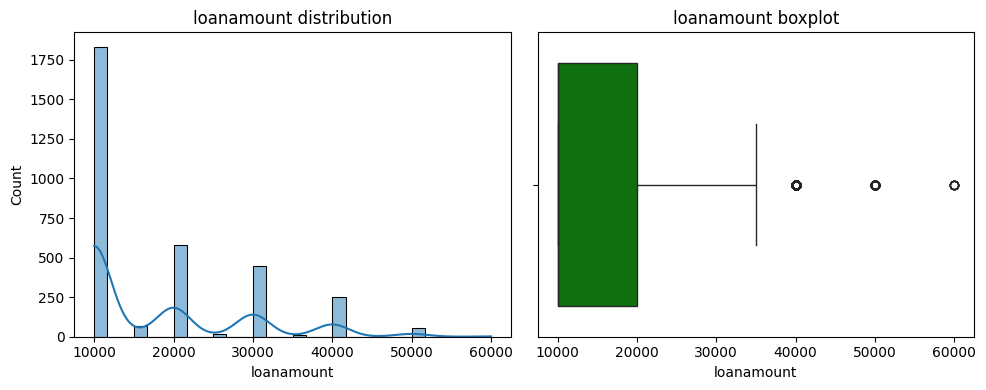

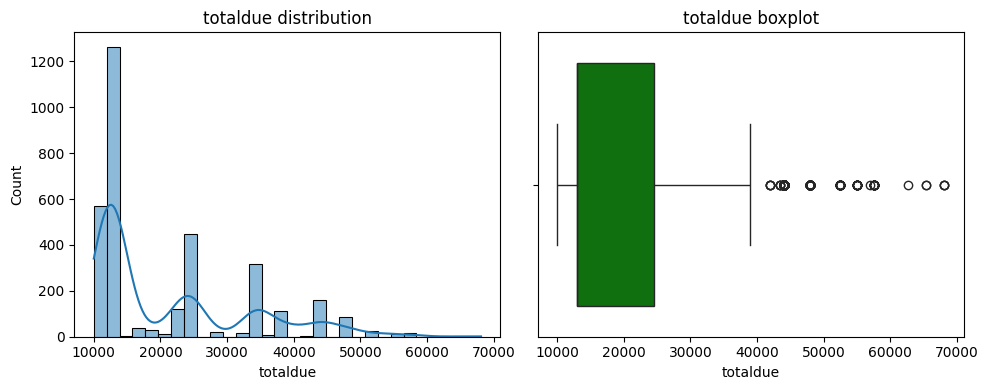

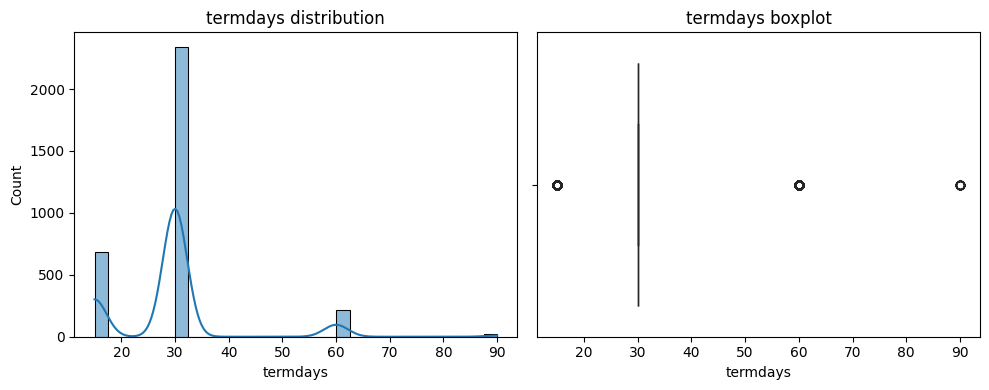

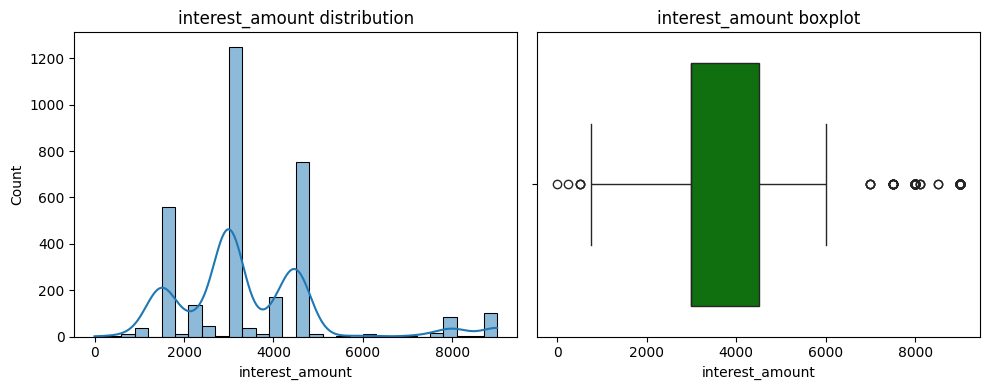

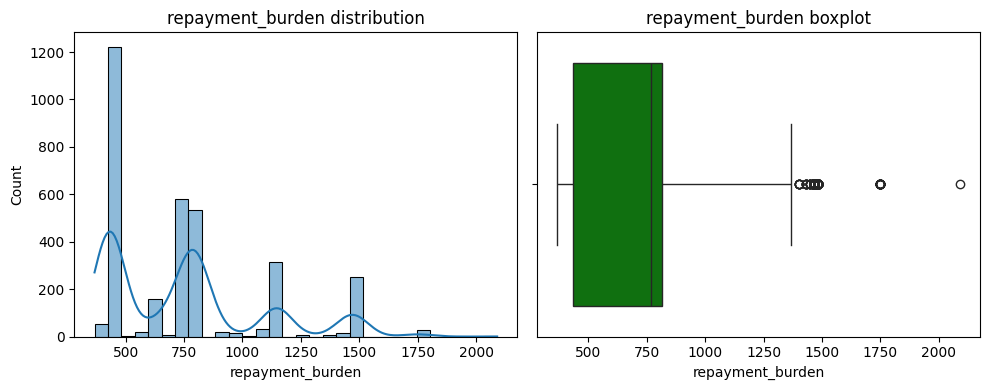

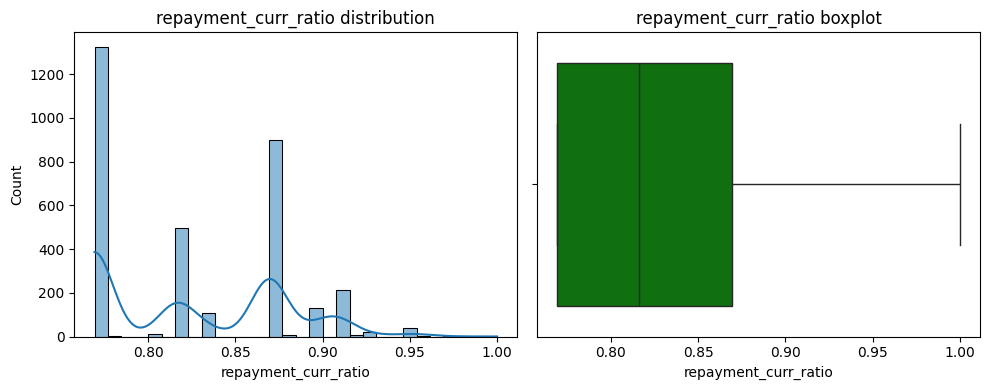

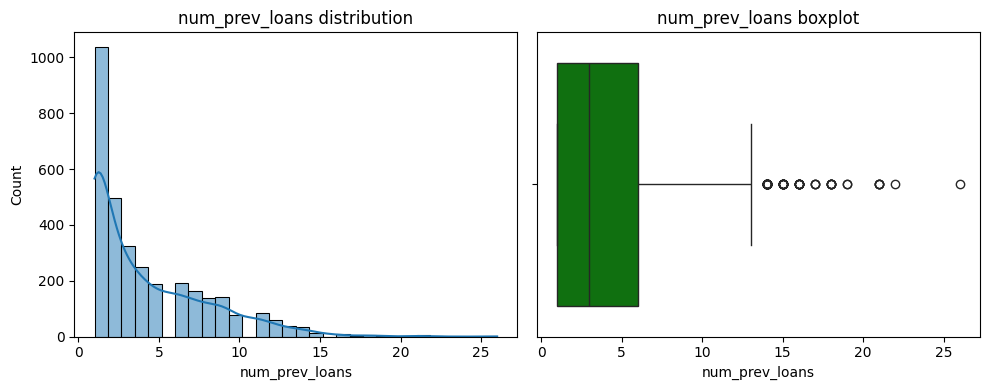

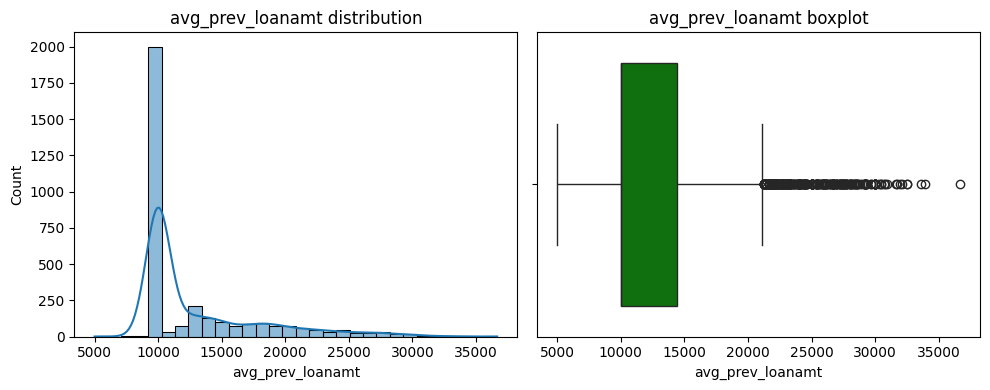

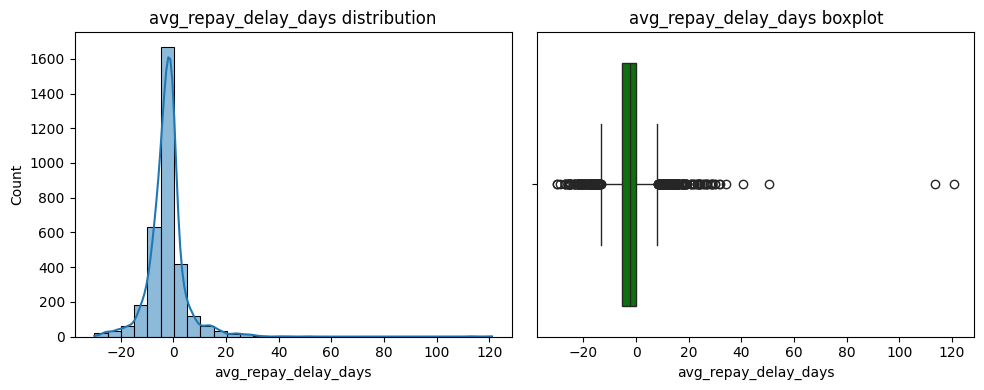

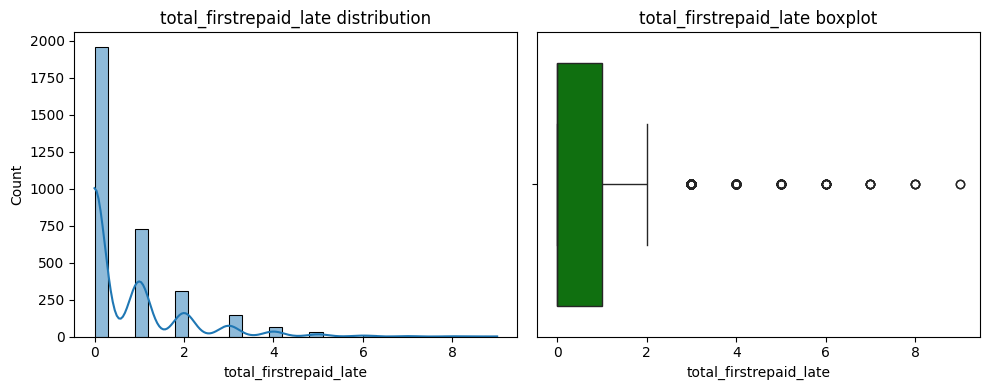

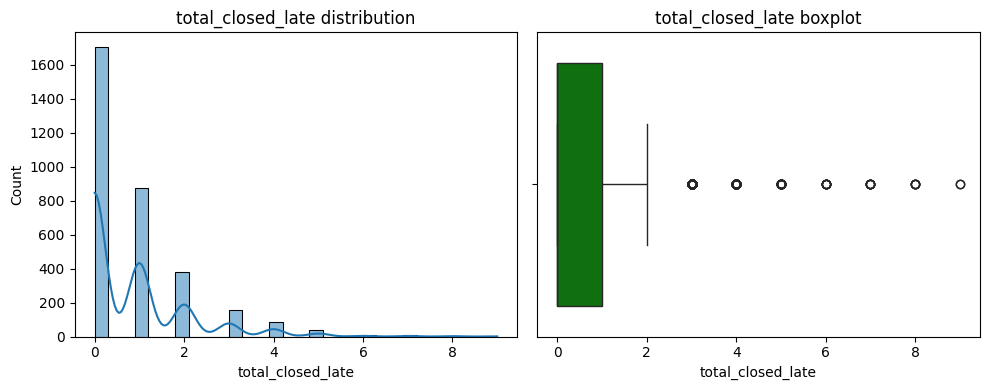

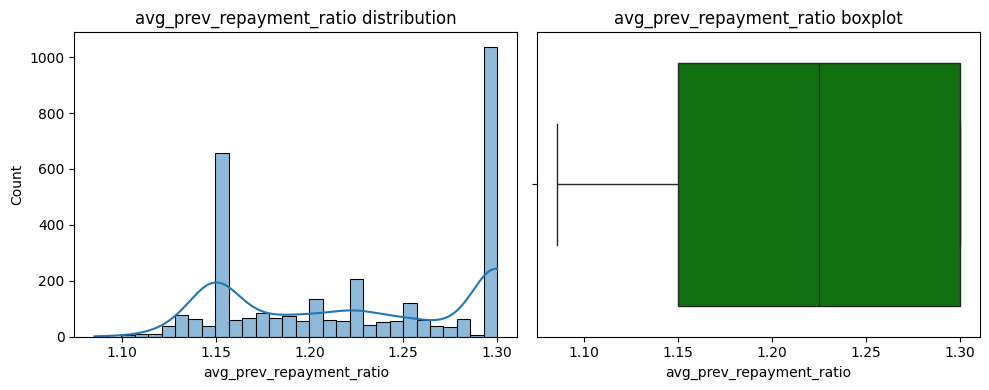

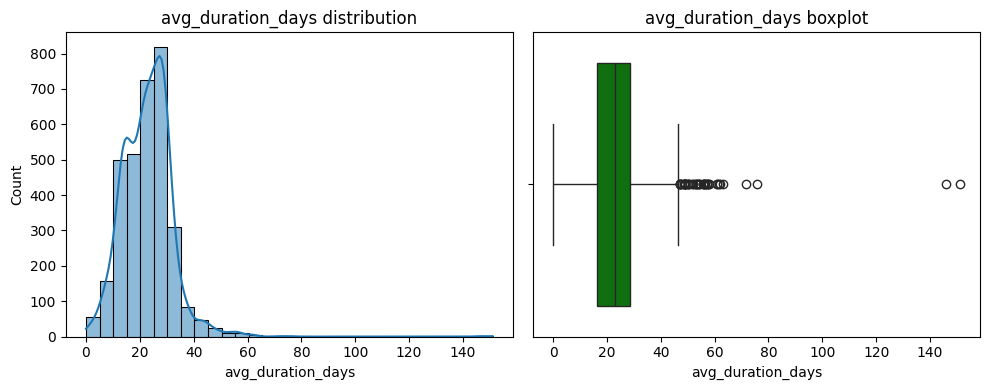

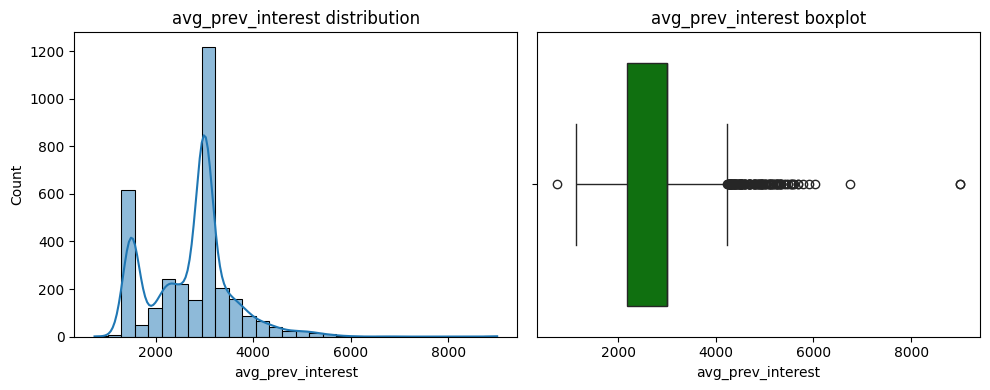

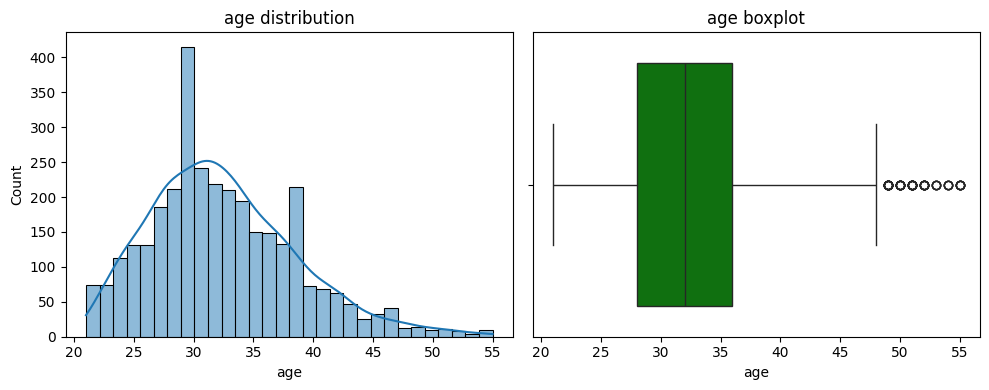

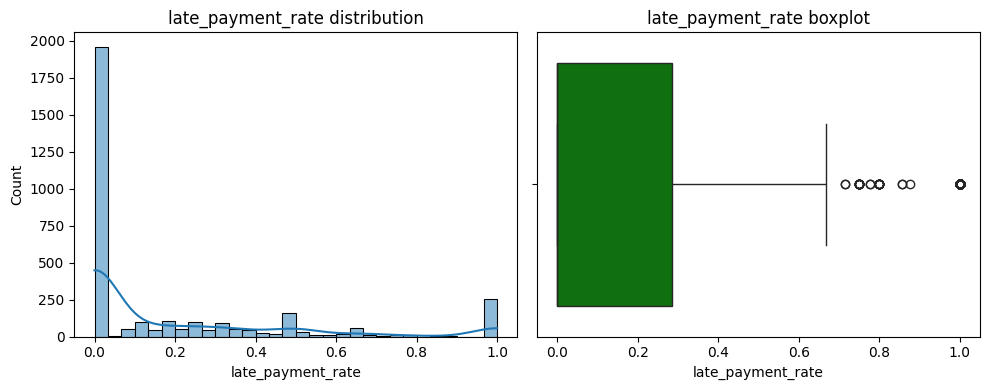

In [155]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(final_join[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x = final_join[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

From the visualization, I observed the following:

**Loan Amount Distribution** 
- From the histogram , most loans are heavily concentrated around 10,000.
- The boxplot confirms clustering in the lower loan range. The clustering could be due to lending rules that cap loans for new or risky customers.

**Total Due Distribution** 
- The histogram is more like the loan amount. heavily concentrated between 12k and 15k due to the interest.
- Outliers extending to 70,000 indicates some long term products.

**Terms Days Distribution**
- The histogram shows more concentration around 15 to 30 days which might indicate emergency or quick loan.
- Very few loans extend beyond 45 days, with some outliers reaching 60-90 days.

**Interest Amount Distribution** 
- From the histogram , most interest amount  are heavily concentrated between 1,500 t0 4,000 with outliers reaching 8,000.

**Repayment Burden Distribution**
- Most borrowers have repayment burdens in the ₦500–₦800 range. The distribution also shows clear peaks around ₦500, ₦750, ₦1000, and ₦1500, indicating that repayment amounts are aligned with specific loan product tiers
- The boxplot shows a median repayment burden around ₦750, with most borrowers falling below ₦1250. Only a few outliers go beyond ₦1500, reaching as high as ₦2000.
- The implication of this is that most loans are manageable, but the outliers may need closer attention as they carry higher risk.

**Repayment Current Ratio Distribution**
- The repayment current ratio shows clear clusters around 0.78, 0.82, and 0.88–0.90, with fewer borrowers achieving full repayment (1.0).
- The IQR spans 0.78–0.88, meaning most customers repay between 78% and 88% of their dues.
- While repayment performance is generally strong, encouraging more borrowers to move closer to full repayment would help improve overall portfolio health.

**Number of Previous Loans Distribution**
- The distribution is right-skewed, with most customers having only 1–3 previous loans.
- The boxplot shows most customers fall between 1–7 loans with a few outliers reaching about 25 loans.
- Overall, most borrowers are new with few past loans, while a smaller group has long histories hence,highlighting the need to manage risk for new customers and retain experienced ones.

**Average Previous Loan Amount Distribution**
- The distribution is right-skewed, heavily concentrated around 10,000-12,000.
- Most previous loans in 8,000-15,000 range, with outliers up to 35,000.

**Age Distribution Distribution**
- The distribution is right-skewed, meaning most individuals are younger (around 25–30), and fewer are older (up to 55).
- A Tight clustering (25-40 years) which may  indicate focused marketing or natural market fit
- Outliers around 50 and above years.

**Late Payment Rate Distribution**
- The distribution points to two main borrower groups: reliable payers and consistent defaulters.
- Only a few borrowers have late payment rates around 20% and 80%..
- This suggests that customers should not be treated uniformly, making segmentation an essential strategy.









#### VISUALIZING THE CATEGORICAL COLUMN

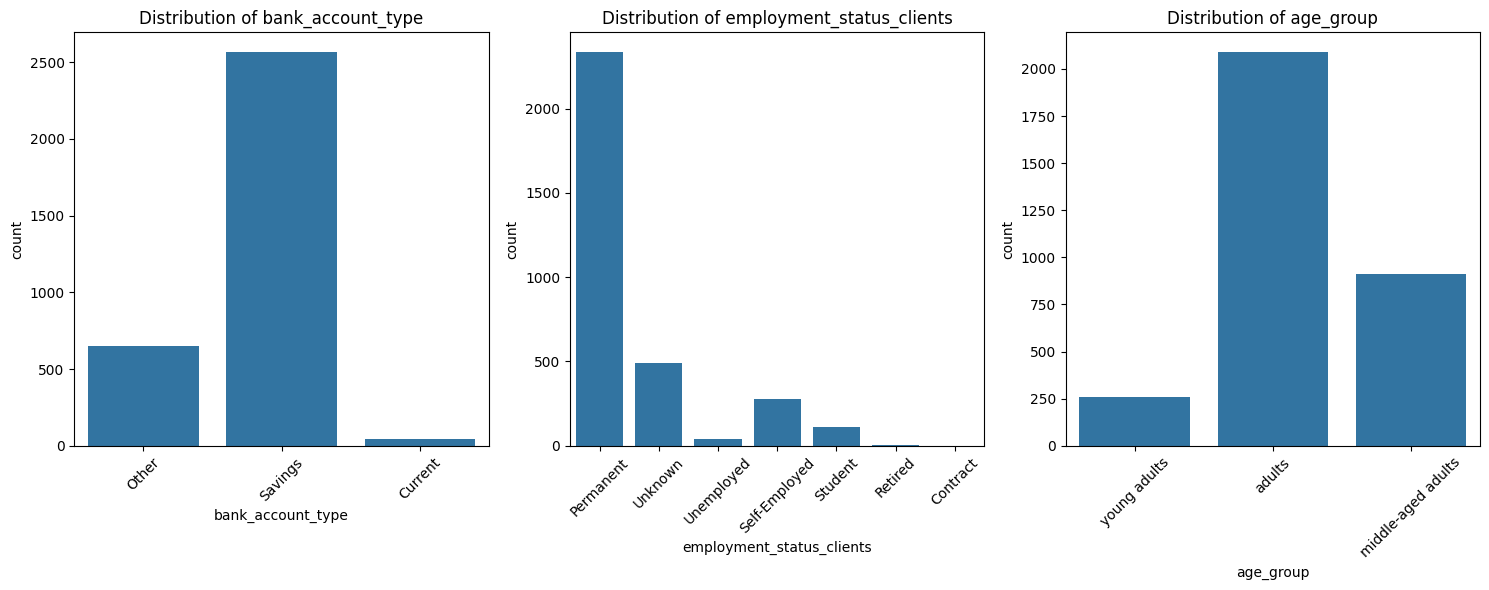

In [156]:
# Visualizing the distribution of 2 categorical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 2 columns

for i, col in enumerate(cat_cols[:3]):  # pick only the first 2 categorical columns
    sns.countplot(ax=axes[i], data=final_join, x=col)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Bank Account Type Distribution
The distribution of bank account types shows a clear dominance of savings accounts, with over 2,500 customers (about 80% of the base), compared to around 650 in the **Other** category and only about 50 holding current accounts. This savings heavy profile suggests the lender mainly serves customers with basic banking relationships rather than advanced transactional needs. The strong preference for savings accounts also points to a financially conservative customer segment, which aligns with the repayment discipline observed earlier.

##### Employment Status Distribution
Employment status distribution highlights permanent employment as the dominant group, with over 2,400 customers (around 75% of the base). This is followed by 500 with unknown status, 300 unemployed, 200 self-employed, and 150 students. The strong concentration of permanently employed customers helps explain the exceptional repayment discipline reflected in the historical performance metrics.

In [157]:
# check the descriptive statistics
final_join.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
loanamount,3264.0,17841.61,10746.27,10000.00,10000.00,10000.00,20000.00,60000.00
totaldue,3264.0,21290.95,11930.91,10000.00,13000.00,13000.00,24500.00,68100.00
termdays,3264.0,29.25,11.40,15.00,30.00,30.00,30.00,90.00
interest_amount,3264.0,3449.35,1691.05,0.00,3000.00,3000.00,4500.00,9000.00
repayment_burden,3264.0,745.69,332.47,366.67,433.33,766.67,816.67,2090.00
repayment_curr_ratio,3264.0,0.82,0.05,0.77,0.77,0.82,0.87,1.00
num_prev_loans,3264.0,4.19,3.67,1.00,1.00,3.00,6.00,26.00
avg_prev_loanamt,3264.0,12946.45,4853.36,5000.00,10000.00,10000.00,14444.44,36666.67
avg_repay_delay_days,3264.0,-2.33,7.39,-30.00,-5.33,-2.33,0.00,121.00
total_firstrepaid_late,3264.0,0.72,1.18,0.00,0.00,0.00,1.00,9.00


From the descriptive statistics ,This dataset covers loan records for 3,264 borrowers, with an average loan amount of 17,841. The typical borrower is about 32 years old, earns roughly 21,290 per month, and maintains manageable debt levels with an average repayment ratio of 82%. Most loans carry 30-day terms, and overall portfolio performance appears strong, marked by relatively low late payment rates (around 19%) and moderate repayment delays. Loan sizes range from 10,000 to 60,000, reflecting a diverse mix, while most borrowers demonstrate solid repayment efficiency despite some differences in prior borrowing history.

### **TARGET COLUMN**

The target column, i.,e, good_bad_flag which is the Loan performance indicator. **0** means defaulted , **1** means not defaulted

<Axes: xlabel='good_bad_flag'>

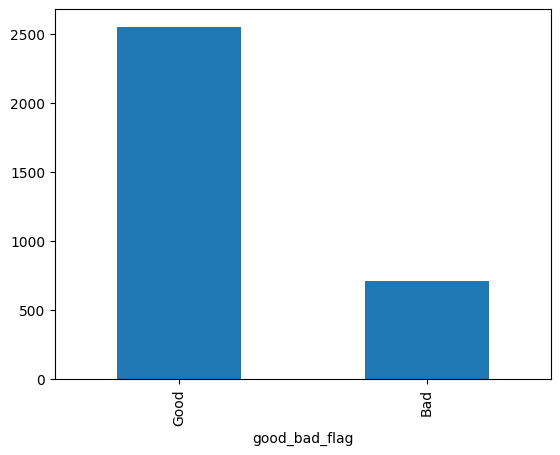

In [158]:
# Target Column 
final_join.good_bad_flag.value_counts().plot(kind='bar')

In [159]:
# convert our target column to number
final_join.good_bad_flag = (final_join.good_bad_flag == 'Good').astype(int)

In [160]:
final_join.good_bad_flag.value_counts()

good_bad_flag
1    2553
0     711
Name: count, dtype: int64

In [161]:
num_cols

['loanamount',
 'totaldue',
 'termdays',
 'interest_amount',
 'repayment_burden',
 'repayment_curr_ratio',
 'num_prev_loans',
 'avg_prev_loanamt',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'total_closed_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'avg_prev_interest',
 'age',
 'late_payment_rate']

In [162]:
num_cols=['loanamount','good_bad_flag',
 'totaldue',
 'termdays',
 'interest_amount',
 'repayment_burden',
 'repayment_curr_ratio',
 'num_prev_loans',
 'avg_prev_loanamt',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'total_closed_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'avg_prev_interest',
 'age',
 #'days_since_last_loan',
 #'repayment_efficiency',
 'late_payment_rate'
 ]

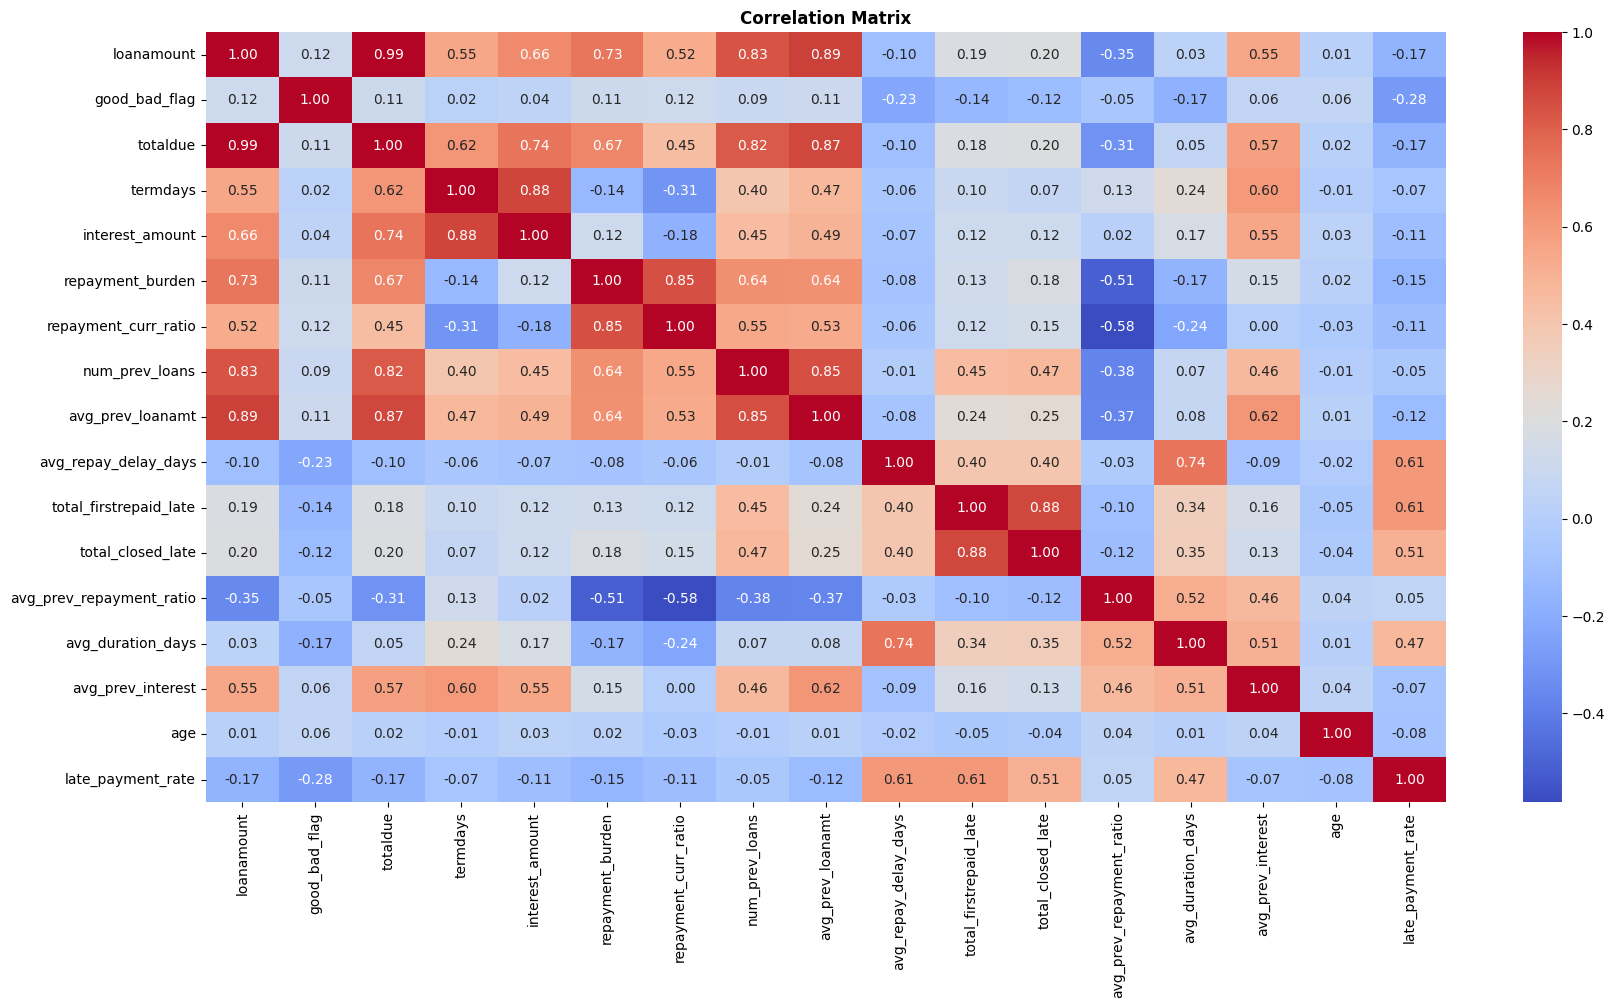

In [163]:
# checking correlation matrix
heatmap = final_join[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=heatmap, fmt=".2f", annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontweight="bold")
plt.show()

My observation from checking which feature correlates with the target column(good_bad_flag) are:

**Strongest Negative Predictors :**

These variables show the strongest negative correlation with good_bad_flag, indicating higher risk of default:

- late_payment_rate (-0.28): Most significant risk factor. A higher rate of late payments strongly increases the likelihood of default.

- avg_repay_delay_days (-0.23): Longer delays in repayment are closely associated with increased default risk.

**Positive Predictors :**

These features show a positive correlation with good_bad_flag, suggesting a protective effect:

- repayment_curr_ratio (+0.12): Borrowers with higher current repayment ratios are more likely to maintain good standing.

**Moderate Predictors :**

These variables show modest correlations that may still offer predictive value:

- loanamount (+0.12): Slight positive correlation with good standing, possibly reflecting better creditworthiness among larger loans.

- total_firstrepaid_late (-0.14): Delays in initial repayments are modestly linked to higher default risk.

**Weak Predictors :**

These features show very low correlation, indicating limited predictive power:

- termdays (+0.02)

- age (+0.06)

I also observed Multicollinearity in my correlation matrix. They have correlation of > 0.80 
- loanamount vs totaldue(0.99)
- termdays vs interest_amount(0.88)
- num_prev_loans vs avg_prev_loanamt (0.85)
- total_firstrepaid_late vs total_closed_late (0.88)

With this observations , I will drop the following:

- totaldue, interest_curr_amount, avg_prev_loanamt, total_closed_late



In [164]:
final_join.drop(['totaldue', 'interest_amount', 'avg_prev_loanamt', 'total_closed_late'], axis=1, inplace=True)

In [165]:
final_join.columns

Index(['loanamount', 'termdays', 'good_bad_flag', 'repayment_burden',
       'repayment_curr_ratio', 'bank_account_type',
       'employment_status_clients', 'num_prev_loans', 'avg_repay_delay_days',
       'total_firstrepaid_late', 'avg_prev_repayment_ratio',
       'avg_duration_days', 'avg_prev_interest', 'age', 'age_group',
       'late_payment_rate'],
      dtype='object')

In [166]:
num_col = ['loanamount', 'good_bad_flag',
 'termdays',
 'repayment_curr_ratio',
 'repayment_burden',
 'num_prev_loans',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'avg_prev_interest',
 #'days_since_last_loan',
 'age',
 'late_payment_rate']

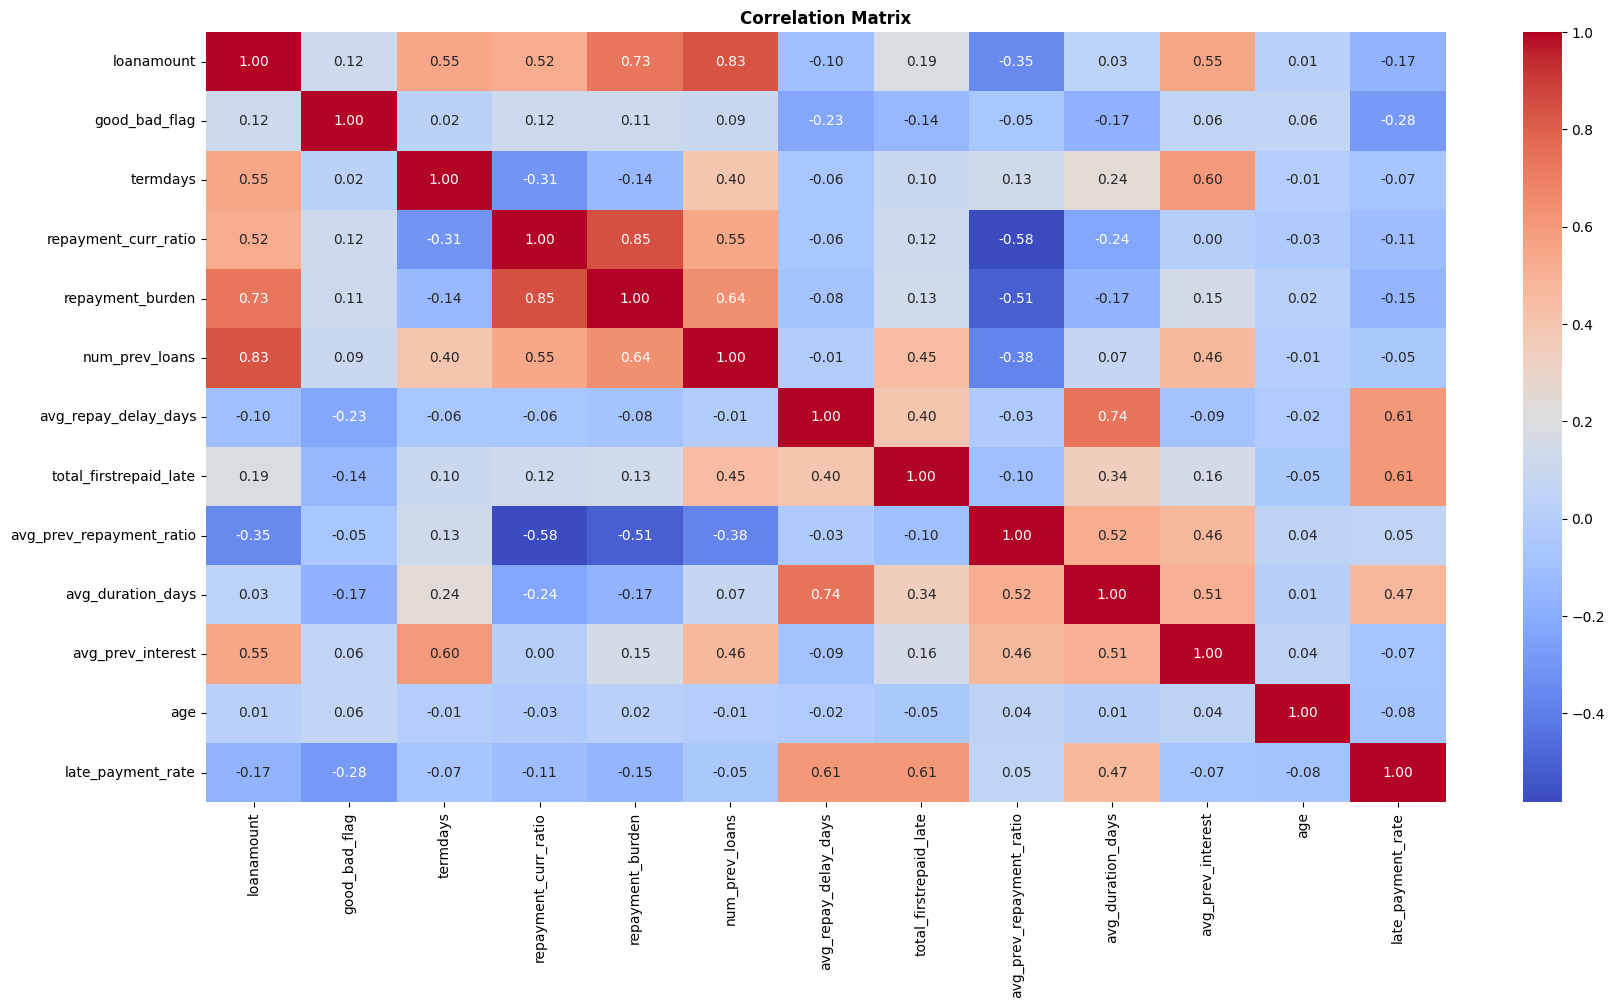

In [167]:
# Check the correlation matrix again
heatmap = final_join[num_col].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=heatmap, fmt=".2f", annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontweight="bold")
plt.show()

# DATA PREPARATION

This is where I will prepare my dataset for prediction

In [168]:
final_join.columns


Index(['loanamount', 'termdays', 'good_bad_flag', 'repayment_burden',
       'repayment_curr_ratio', 'bank_account_type',
       'employment_status_clients', 'num_prev_loans', 'avg_repay_delay_days',
       'total_firstrepaid_late', 'avg_prev_repayment_ratio',
       'avg_duration_days', 'avg_prev_interest', 'age', 'age_group',
       'late_payment_rate'],
      dtype='object')

In [169]:
final_join.head()

,loanamount,termdays,good_bad_flag,repayment_burden,repayment_curr_ratio,bank_account_type,employment_status_clients,num_prev_loans,avg_repay_delay_days,total_firstrepaid_late,avg_prev_repayment_ratio,avg_duration_days,avg_prev_interest,age,age_group,late_payment_rate
0,30000.0,30,1,1150.000000,0.869565,Other,Permanent,11,-0.909091,3,1.229091,29.454545,3900.0,45,middle-aged adults,0.272727
1,20000.0,15,1,1483.333333,0.898876,Other,Permanent,6,0.833333,1,1.175000,18.166667,1750.0,32,adults,0.166667
2,10000.0,15,1,766.666667,0.869565,Savings,Permanent,2,7.500000,2,1.225000,31.500000,2250.0,39,middle-aged adults,1.000000
3,40000.0,30,1,1466.666667,0.909091,Other,Permanent,8,-3.125000,0,1.258750,27.000000,4800.0,30,adults,0.000000
4,10000.0,30,1,433.333333,0.769231,Savings,Permanent,2,-2.500000,0,1.225000,19.500000,2250.0,28,adults,0.000000


In [170]:
# separate the features and target
X = final_join.drop(columns='good_bad_flag')
y = final_join['good_bad_flag']

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
# separate into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

### DATA PREPROCESSOR USING COLUMN TRANSFORMER(BEFORE BALANCING)

In [173]:
#Import the neccessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [174]:
# split into cat and num cols
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [175]:
num_cols

['loanamount',
 'termdays',
 'repayment_burden',
 'repayment_curr_ratio',
 'num_prev_loans',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'avg_prev_interest',
 'age',
 'late_payment_rate']

In [176]:
cat_cols

['bank_account_type', 'employment_status_clients', 'age_group']

In [177]:
# create a pipeline for the preprocessing
#Numerical column pipeline
num_pipeline = Pipeline(steps=[
    ('Scaler',StandardScaler())
])
#Categorical column pipeline
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))

])

In [178]:
# Apply the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', num_pipeline, num_cols),
    ('encoded_cat', cat_pipeline, cat_cols),
])

In [179]:
preprocessor

,transformers,"[('scaled_num', ...), ('encoded_cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [180]:
#Import the necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

# import the necessary metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
  


In [181]:
# define our model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42,class_weight='balanced',verbose=-1)     
}

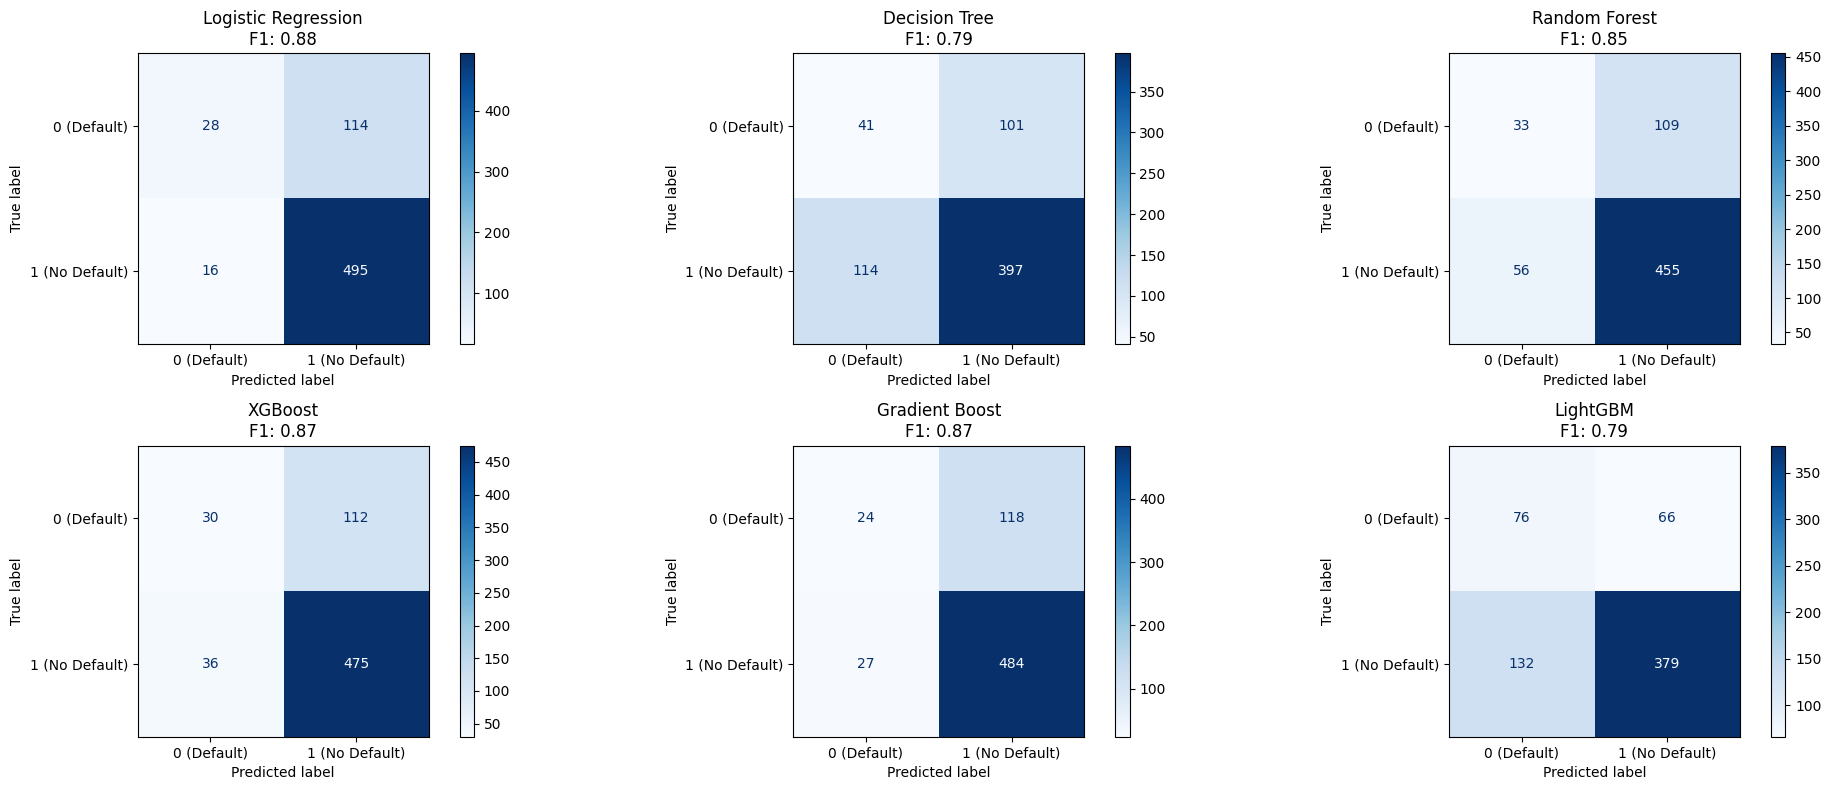

Model Performance (Before Balancing):
                     train accuracy  test accuracy  precision score  \
Logistic Regression            0.78           0.80             0.81   
Decision Tree                  0.95           0.67             0.80   
Random Forest                  0.95           0.75             0.81   
XGBoost                        0.90           0.77             0.81   
Gradient Boost                 0.83           0.78             0.80   
LightGBM                       0.83           0.70             0.85   

                     recall score  F1 score  ROC AUC  
Logistic Regression          0.97      0.88     0.70  
Decision Tree                0.78      0.79     0.56  
Random Forest                0.89      0.85     0.65  
XGBoost                      0.93      0.87     0.65  
Gradient Boost               0.95      0.87     0.69  
LightGBM                     0.74      0.79     0.67  


In [182]:
results = {}
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('select', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # Compute metrics (simplified for binary classification)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

     
    if hasattr(pipeline, "predict_proba"):
        test_probs = pipeline.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, test_probs)
    else:
        test_auc = None

     # Store results
    results[name] = {
        'train accuracy': train_acc,
        'test accuracy': test_acc,
        'precision score': precision,
        'recall score': recall,
        'F1 score': f1,                     
        'ROC AUC': test_auc
    }

    # Confusion matrix plot
    cm = confusion_matrix(y_test, test_pred)  # Actual vs prediction
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (Default)', '1 (No Default)'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'{name}\nF1: {f1:.2f}')

plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame(results).T  # Transpose for models as rows
print("Model Performance (Before Balancing):")
print(metrics_df.round(2))

In [183]:
metrics_df

,train accuracy,test accuracy,precision score,recall score,F1 score,ROC AUC
Logistic Regression,0.784757,0.800919,0.812808,0.968689,0.883929,0.701821
Decision Tree,0.945998,0.670750,0.797189,0.776908,0.786918,0.557068
Random Forest,0.945998,0.747320,0.806738,0.890411,0.846512,0.645097
XGBoost,0.901187,0.773354,0.809199,0.929550,0.865209,0.646082
Gradient Boost,0.829567,0.777948,0.803987,0.947162,0.869721,0.685614
LightGBM,0.832631,0.696784,0.851685,0.741683,0.792887,0.665410


In [184]:
y_train.value_counts()

good_bad_flag
1    2042
0     569
Name: count, dtype: int64

In [185]:
y_test.value_counts()

good_bad_flag
1    511
0    142
Name: count, dtype: int64

### INTERPRETATION BEFORE BALANCING

#### **Key Metrics**

- **True Positive (TP):**
The model correctly predicted the positive class. In the case of "default," this would mean the model predicted **default** and the actual outcome was **default.**
- **False Negative (FN):**
The model incorrectly predicted the negative class when the actual outcome was positive. For "default," this means the model predicted **non-default** but the actual outcome was **default**
- **False Positive (FP):**
The model incorrectly predicted the positive class when the actual outcome was negative. For "default," this means the model predicted **default** but the actual outcome was **non-default.** 
- **True Negative (TN):**
The model correctly predicted the negative class. For "default," this means the model predicted **non-default** and the actual outcome was **non-default.**

Since the dataset is imbalanced with more **No Default** cases than **Default**, most of the models tend to favor predicting **No Default.** As a result, the TP and the FP  values appear relatively low compared to the TN and FN values.

**In conclusion**, the models strongly favor predicting **No Default** because that class dominates which leads to high recall but weak detection of actual defaults.






### BALANCING THE TARGET COLUMN

In [186]:
# import the necessary libraries

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  
from imblearn.over_sampling import SMOTE


Detailed Classification Report for Logistic Regression:
                precision    recall  f1-score   support

   0 (Default)       0.38      0.55      0.45       142
1 (No Default)       0.86      0.76      0.80       511

      accuracy                           0.71       653
     macro avg       0.62      0.65      0.63       653
  weighted avg       0.75      0.71      0.73       653


Detailed Classification Report for Decision Tree:
                precision    recall  f1-score   support

   0 (Default)       0.30      0.38      0.33       142
1 (No Default)       0.81      0.75      0.78       511

      accuracy                           0.67       653
     macro avg       0.55      0.56      0.56       653
  weighted avg       0.70      0.67      0.68       653


Detailed Classification Report for Random Forest:
                precision    recall  f1-score   support

   0 (Default)       0.39      0.35      0.37       142
1 (No Default)       0.82      0.85      0.83     

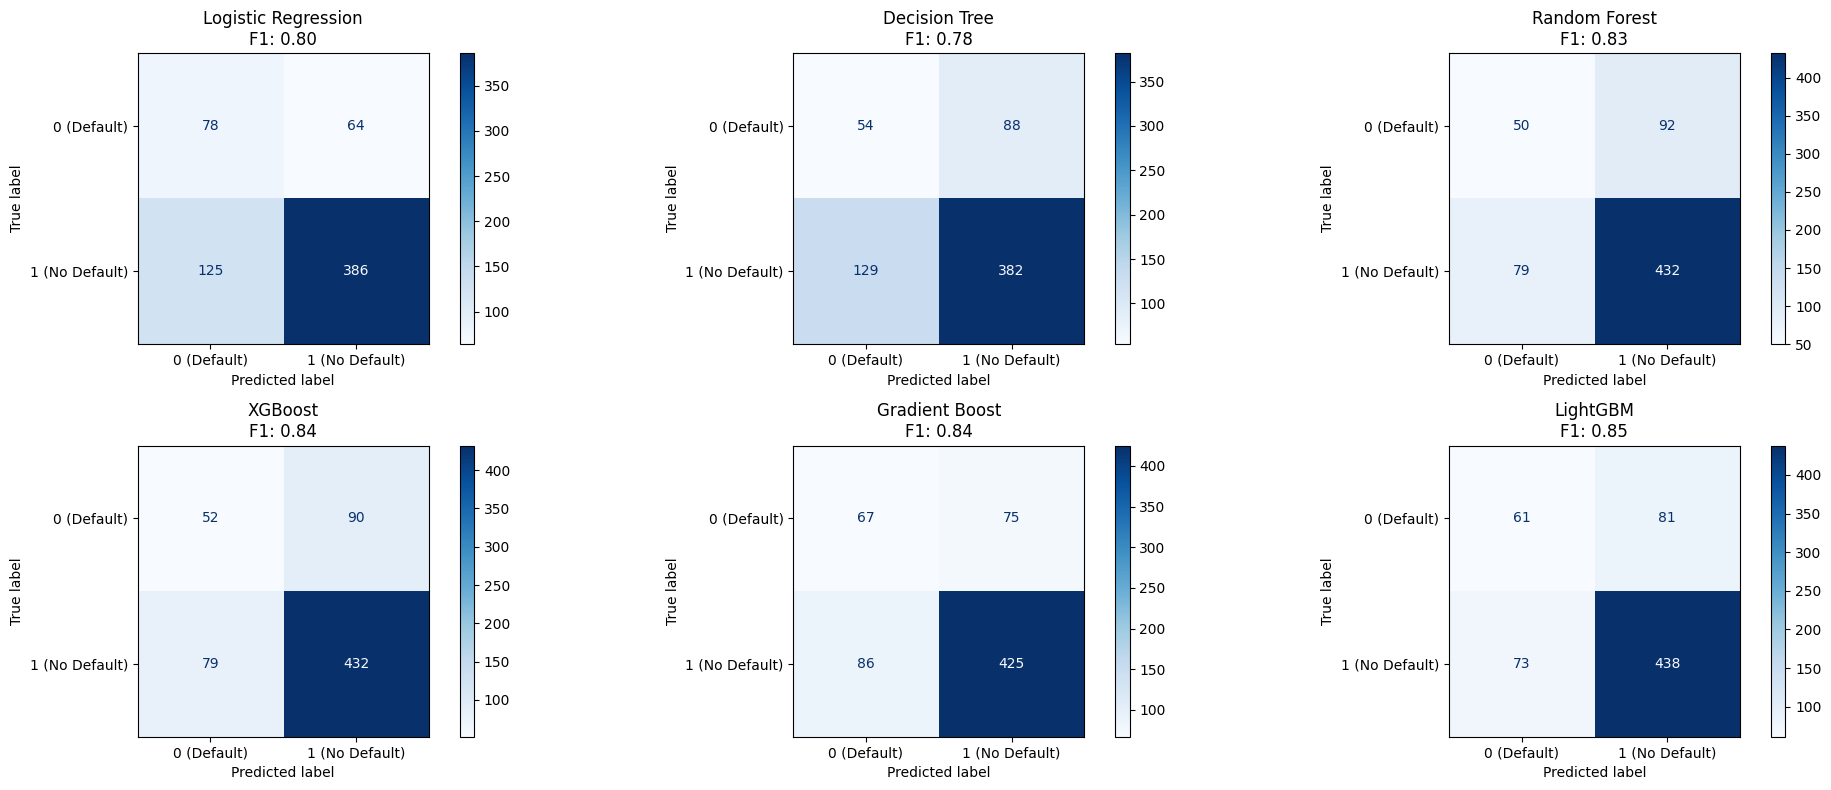

Model Performance (After Balancing):
                     train accuracy  test accuracy  precision score  \
Logistic Regression            0.72           0.71             0.86   
Decision Tree                  0.95           0.67             0.81   
Random Forest                  0.95           0.74             0.82   
XGBoost                        0.89           0.74             0.83   
Gradient Boost                 0.78           0.75             0.85   
LightGBM                       0.85           0.76             0.84   

                     recall score  F1 score  ROC AUC  
Logistic Regression          0.76      0.80     0.70  
Decision Tree                0.75      0.78     0.59  
Random Forest                0.85      0.83     0.66  
XGBoost                      0.85      0.84     0.66  
Gradient Boost               0.83      0.84     0.69  
LightGBM                     0.86      0.85     0.68  


In [187]:
results = {}
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # SMOTE Applied for balancing the target column
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('select', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # Compute metrics (simplified for binary classification)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

     
    if hasattr(pipeline, "predict_proba"):
        test_probs = pipeline.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, test_probs)
    else:
        test_auc = None

     # Store results
    results[name] = {
        'train accuracy': train_acc,
        'test accuracy': test_acc,
        'precision score': precision,
        'recall score': recall,
        'F1 score': f1,                     
        'ROC AUC': test_auc
    }

    # Confusion matrix plot
    cm = confusion_matrix(y_test, test_pred)  # Actual vs prediction
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (Default)', '1 (No Default)'])
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'{name}\nF1: {f1:.2f}')

     # Printing classification report for each model
    print(f"\nDetailed Classification Report for {name}:")
    print(classification_report(y_test, test_pred, target_names=['0 (Default)', '1 (No Default)']))

plt.tight_layout()
plt.show()
 #disp = ConfusionMatrixDisplay(cm,display_labels=["Not_Leaving","Leaving"])

metrics_df = pd.DataFrame(results).T  # Transpose for models as rows
print("Model Performance (After Balancing):")
print(metrics_df.round(2))


In [188]:
metrics_df

,train accuracy,test accuracy,precision score,recall score,F1 score,ROC AUC
Logistic Regression,0.720031,0.710567,0.857778,0.755382,0.803330,0.702895
Decision Tree,0.945615,0.667688,0.812766,0.747554,0.778797,0.588593
Random Forest,0.945998,0.738132,0.824427,0.845401,0.834783,0.659002
XGBoost,0.886633,0.741194,0.827586,0.845401,0.836399,0.661834
Gradient Boost,0.781310,0.753446,0.850000,0.831703,0.840752,0.690189
LightGBM,0.851398,0.764165,0.843931,0.857143,0.850485,0.679956


### **Observation**
Balancing the target column led to a significant improvement in predictive performance across all models. However, some models, such as Random Forest and Decision Tree showed signs of overfitting thereby performing strongly on certain metrics but producing poor results in the classification report for the 0 class (defaulters). This weakness indicates that while they were able to capture patterns in the majority class, they struggled to correctly identify actual defaulters, which is critical in the context of credit risk prediction.While Other models like Logistic, Gradient Boost, XGBoost and CatBoost performed well without overfitting as well.Logistic did better in catching more defaulters.

#### CHECKING THE BALANCING OF THE TARGET COLUMN

In [189]:
# Preprocess first
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE
X_resampled, y_resampled = pipeline.named_steps['smote'].fit_resample(X_train_processed, y_train)

# Check balance
print(y_resampled.value_counts())

good_bad_flag
1    2042
0    2042
Name: count, dtype: int64


In [190]:
# Preprocess first
X_test_processed = preprocessor.fit_transform(X_test)

# Apply SMOTE
X_resampled, y_resampled = pipeline.named_steps['smote'].fit_resample(X_test_processed, y_test)

# Check balance
print(y_resampled.value_counts())

good_bad_flag
0    511
1    511
Name: count, dtype: int64


### HANDLING OUTLIERS AND SKEWNESS

we can se that the models are not performing as well as they should, so I will be treating outliers and handle skewness to see if there will be any form of improvement in the models.

### TRANSFORMATION

In [191]:
#Calulate the skewness level
skewness = final_join[num_cols].skew().sort_values(ascending=False)
skewness

avg_repay_delay_days        3.124901
total_firstrepaid_late      2.309080
avg_duration_days           1.892429
termdays                    1.879422
late_payment_rate           1.662308
num_prev_loans              1.317616
loanamount                  1.240059
repayment_burden            0.972535
age                         0.692074
avg_prev_interest           0.505214
repayment_curr_ratio        0.337001
avg_prev_repayment_ratio   -0.038459
dtype: float64

In [192]:
# Dealing with skewness using winsorization
#final_join['sqrt_days_since_last_loan'] = np.sqrt(final_join['days_since_last_loan'])
final_join['sqrt_late_payment_rate'] = np.sqrt(final_join['late_payment_rate'])
final_join['sqrt_termdays'] = np.sqrt(final_join['termdays'])
final_join['sqrt_loanamount'] = np.sqrt(final_join['loanamount'])
final_join['sqrt_avg_prev_interest'] = np.sqrt(final_join['avg_prev_interest'])
final_join['sqrt_repayment_burden'] = np.sqrt(final_join['repayment_burden'])

### Model Training and Prediction with Transformed Columns

**DATA PREPARATION AFTER TRANSFORMATION**

In [193]:
final_join.columns

Index(['loanamount', 'termdays', 'good_bad_flag', 'repayment_burden',
       'repayment_curr_ratio', 'bank_account_type',
       'employment_status_clients', 'num_prev_loans', 'avg_repay_delay_days',
       'total_firstrepaid_late', 'avg_prev_repayment_ratio',
       'avg_duration_days', 'avg_prev_interest', 'age', 'age_group',
       'late_payment_rate', 'sqrt_late_payment_rate', 'sqrt_termdays',
       'sqrt_loanamount', 'sqrt_avg_prev_interest', 'sqrt_repayment_burden'],
      dtype='object')

In [194]:
#split into target and features

X = final_join.drop(columns=[ 'late_payment_rate', 'termdays', 'loanamount', 'avg_prev_interest', 'repayment_burden','good_bad_flag'])
y = final_join['good_bad_flag']

In [195]:
# separate into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [196]:
# split into cat and num cols
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [197]:
num_cols

['repayment_curr_ratio',
 'num_prev_loans',
 'avg_repay_delay_days',
 'total_firstrepaid_late',
 'avg_prev_repayment_ratio',
 'avg_duration_days',
 'age',
 'sqrt_late_payment_rate',
 'sqrt_termdays',
 'sqrt_loanamount',
 'sqrt_avg_prev_interest',
 'sqrt_repayment_burden']

In [198]:
cat_cols

['bank_account_type', 'employment_status_clients', 'age_group']

In [199]:
# create a pipeline for the preprocessing
#Numerical column pipeline
num_pipeline = Pipeline(steps=[
    ('Scaler',StandardScaler())
])
#Categorical column pipeline
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))

])

preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', num_pipeline, num_cols),
    ('encoded_cat', cat_pipeline, cat_cols),
])

In [200]:
preprocessor

,transformers,"[('scaled_num', ...), ('encoded_cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [201]:
# define our model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42,class_weight='balanced',verbose=-1)     
}


Detailed Classification Report for Logistic Regression:
                precision    recall  f1-score   support

   0 (Default)       0.38      0.51      0.44       142
1 (No Default)       0.85      0.77      0.81       511

      accuracy                           0.71       653
     macro avg       0.62      0.64      0.62       653
  weighted avg       0.75      0.71      0.73       653


Detailed Classification Report for Decision Tree:
                precision    recall  f1-score   support

   0 (Default)       0.29      0.35      0.32       142
1 (No Default)       0.81      0.77      0.79       511

      accuracy                           0.67       653
     macro avg       0.55      0.56      0.55       653
  weighted avg       0.70      0.67      0.68       653


Detailed Classification Report for Random Forest:
                precision    recall  f1-score   support

   0 (Default)       0.40      0.35      0.37       142
1 (No Default)       0.82      0.86      0.84     

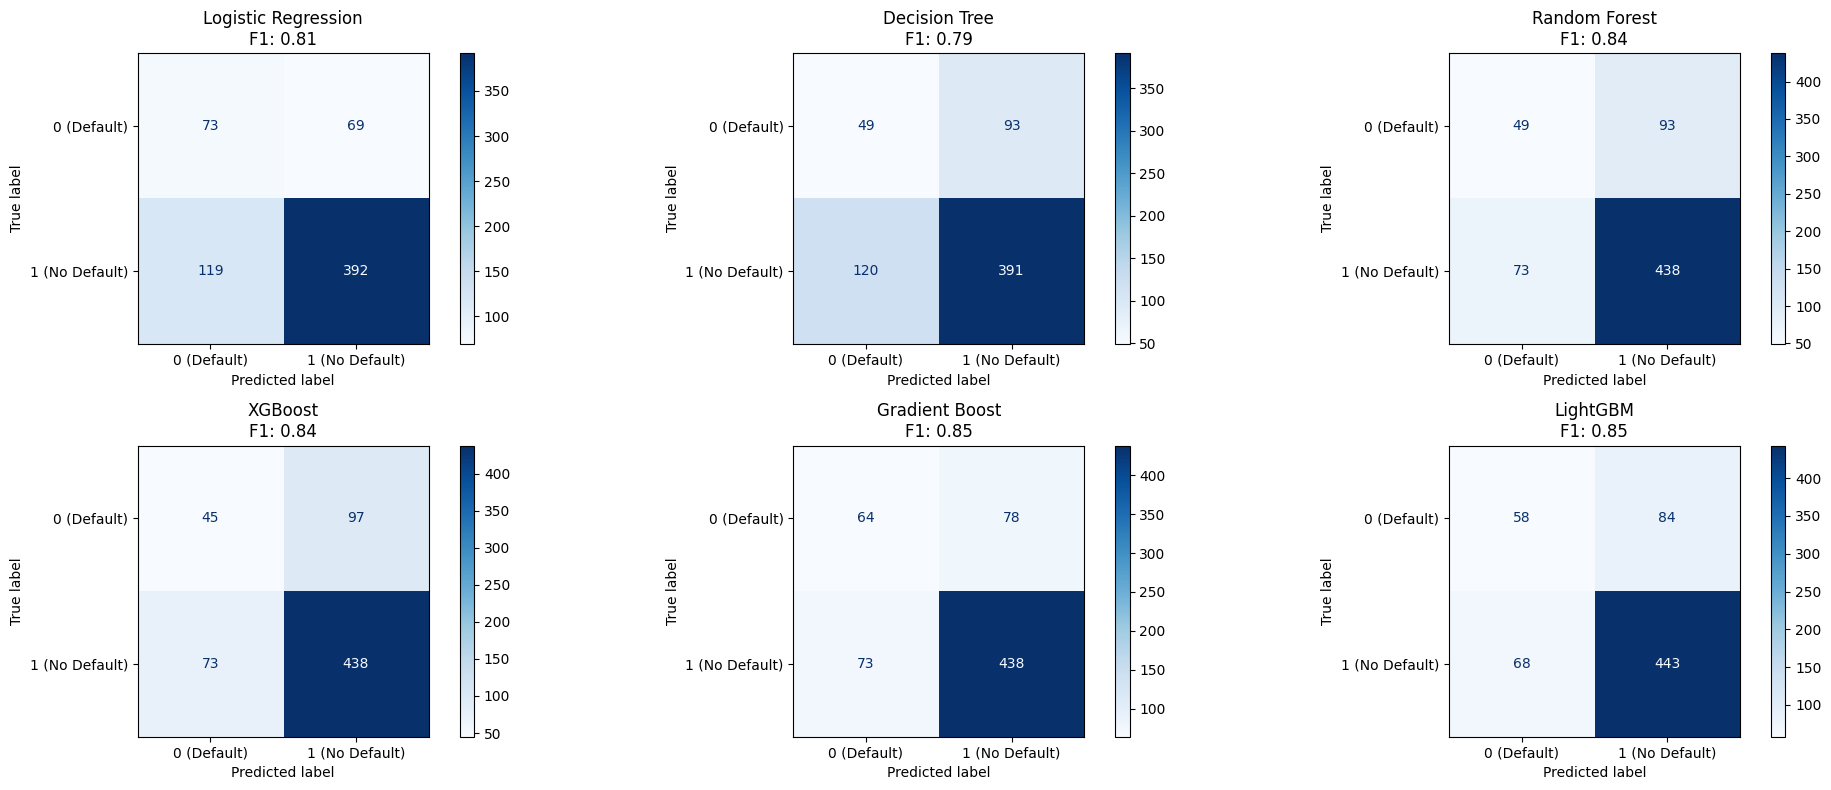

Model Performance (After Balancing):
                     train accuracy  test accuracy  precision score  \
Logistic Regression            0.73           0.71             0.85   
Decision Tree                  0.95           0.67             0.81   
Random Forest                  0.95           0.75             0.82   
XGBoost                        0.89           0.74             0.82   
Gradient Boost                 0.79           0.77             0.85   
LightGBM                       0.85           0.77             0.84   

                     recall score  F1 score  ROC AUC  
Logistic Regression          0.77      0.81     0.71  
Decision Tree                0.77      0.79     0.59  
Random Forest                0.86      0.84     0.66  
XGBoost                      0.86      0.84     0.67  
Gradient Boost               0.86      0.85     0.69  
LightGBM                     0.87      0.85     0.68  


In [202]:
results = {}
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # SMOTE Applied for balancing the target column
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('select', SelectKBest(score_func=f_classif, k=10)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # Compute metrics (simplified for binary classification)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

     
    if hasattr(pipeline, "predict_proba"):
        test_probs = pipeline.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, test_probs)
    else:
        test_auc = None

     # Store results
    results[name] = {
        'train accuracy': train_acc,
        'test accuracy': test_acc,
        'precision score': precision,
        'recall score': recall,
        'F1 score': f1,                     
        'ROC AUC': test_auc
    }

     # Printing classification report for each model
    print(f"\nDetailed Classification Report for {name}:")
    print(classification_report(y_test, test_pred, target_names=['0 (Default)', '1 (No Default)']))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, test_pred)  # Actual vs prediction
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (Default)', '1 (No Default)'])
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'{name}\nF1: {f1:.2f}')

plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame(results).T  # Transpose for models as rows
print("Model Performance (After Balancing):")
print(metrics_df.round(2))


In [203]:
metrics_df

,train accuracy,test accuracy,precision score,recall score,F1 score,ROC AUC
Logistic Regression,0.727691,0.712098,0.850325,0.767123,0.806584,0.705211
Decision Tree,0.945615,0.673813,0.807851,0.765166,0.785930,0.585182
Random Forest,0.945998,0.745789,0.824859,0.857143,0.840691,0.659429
XGBoost,0.888165,0.739663,0.818692,0.857143,0.837476,0.671068
Gradient Boost,0.787055,0.768760,0.848837,0.857143,0.852970,0.687619
LightGBM,0.851781,0.767228,0.840607,0.866928,0.853565,0.677124


### **Observation**




### MODEL SELECTION 

From the above, it is very clear that Logistic regression is the preferred model and I will be giving my reasons below:

Comparing logistic Regression to the next best model with Gradient Boost, Let us look at the key metrics of both

**Logistic Regression**

|                     | **Predicted Default (0)** | **Predicted Non-Default (1)** |
|---------------------|---------------------------|--------------------------------|
| **Actual Default (0)**     | TP = 73                  | FN = 69                        |
| **Actual Non-Default (1)** | FP = 119                 | TN = 392                       |

- **TP (True Positive)**: 73 → Defaulters correctly identified as defaulters.  
- **FN (False Negative)**: 69 → Defaulters wrongly classified as good customers.  
- **FP (False Positive)**: 119 → Good customers wrongly flagged as risky.  
- **TN (True Negative)**: 392 → Good customers correctly classified.  

**For Class 0 (Default):**
- **Recall** =  **0.51**
- **Precision** =  **0.38**
- **F1-score** = **0.44**

**Gradient Boost**

|                     | **Predicted Default (0)** | **Predicted Non-Default (1)** |
|---------------------|---------------------------|--------------------------------|
| **Actual Default (0)**     | TP = 64                  | FN = 78                        |
| **Actual Non-Default (1)** | FP = 73                  | TN = 438                       |

- **TP (True Positive)**: 64 → Defaulters correctly identified as defaulters.  
- **FN (False Negative)**: 78 → Defaulters wrongly classified as good customers.  
- **FP (False Positive)**: 73 → Good customers wrongly flagged as risky.  
- **TN (True Negative)**: 438 → Good customers correctly classified. 

**For Class 0 (Default):**
- **Recall** =  **0.45**
- **Precision** = **0.47**
- **F1-score** = **0.46**


After Evaluating Logistic Regression and Gradient Boost using classification reports, confusion matrices, recall, precision, F1-score, ROC AUC, and accuracy on both training and test data, Logistic Regression emerged as the most suitable model for our loan default risk prediction task.

Our primary business objective is to minimize financial losses by accurately identifying potential defaulters before loans are approved. In this context, the most costly error is a False Negative (FN) which is approving a loan for a borrower who will eventually default. Reducing false negatives directly prevents loan losses and improves the quality of the credit portfolio.

Logistic Regression consistently demonstrated the **highest recall** for the default class (Class 0), meaning it captures more actual defaulters than other models. While this comes with a trade-off of slightly higher False Positives (FP) where some good borrowers are wrongly classified as risky, the business impact of this is much less severe than missing actual defaulters. False positives represent lost opportunities, but false negatives translate into direct financial losses.

Another advantage is that Logistic Regression is **interpretable and transparent**, making it easier for risk managers and regulators to understand and trust the decision process . This interpretability is crucial in financial services where model transparency is key for risk management and regulatory compliance.

In summary, despite the other models like Gradient Boost and LightGBM showing stronger overall accuracy and balanced metrics, Logistic Regression best aligns with our business objective of reducing defaults. By prioritizing recall and minimizing false negatives, it ensures better risk control, stronger credit decision-making, and ultimately greater protection against financial losses.


Detailed Classification Report for Logistic Regression:
                precision    recall  f1-score   support

   0 (Default)       0.38      0.51      0.44       142
1 (No Default)       0.85      0.77      0.81       511

      accuracy                           0.71       653
     macro avg       0.62      0.64      0.62       653
  weighted avg       0.75      0.71      0.73       653



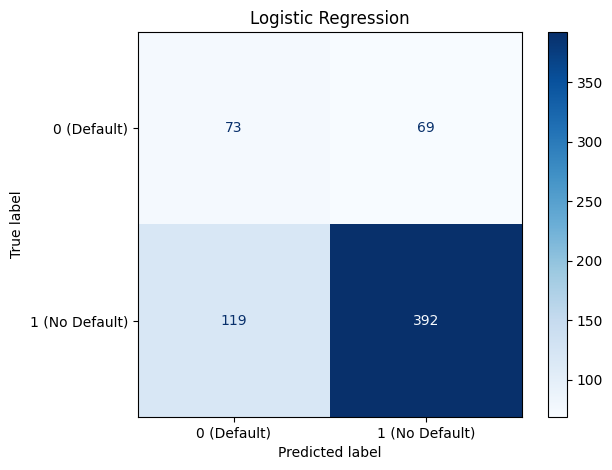

In [204]:
results = {}

name = "Logistic Regression"

final_model = LogisticRegression()


# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', final_model)
])

pipeline.fit(X_train, y_train)
    
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

    # Compute metrics (simplified for binary classification)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

     
if hasattr(pipeline, "predict_proba"):
    test_probs = pipeline.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_probs)
else:
    test_auc = None

     # Store results
results[name] = {
    'train accuracy': train_acc,
    'test accuracy': test_acc,
    'precision score': precision,
    'recall score': recall,
    'F1 score': f1,                     
    'ROC AUC': test_auc
    }

# Printing classification report for each model
print(f"\nDetailed Classification Report for {name}:")
print(classification_report(y_test, test_pred, target_names=['0 (Default)', '1 (No Default)']))

# Confusion matrix plot
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, test_pred)  # Actual vs prediction
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (Default)', '1 (No Default)'])
disp.plot(ax=ax, cmap='Blues')
ax.set_title(f'{name}')

plt.tight_layout()
plt.show()


#### FEATURE IMPORTANCE USING SHAP

In [205]:
import shap

In [206]:
# Fit the pipeline =====
pipeline.fit(X_train, y_train)

# Extract trained Logistic Regression model =====
model = pipeline.named_steps['classifier']

# Transform X_train with the full preprocessing pipeline (up to classifier) =====
# We use the pipeline, but stop before the classifier
X_train_processed = pipeline[:-1].transform(X_train)

# Get feature names AFTER VarianceThreshold =====
feature_names = pipeline[:-1].get_feature_names_out()

# Convert to DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

#  SHAP for Logistic Regression =====
explainer = shap.LinearExplainer(
    model, 
    X_train_processed_df, 
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_train_processed_df)


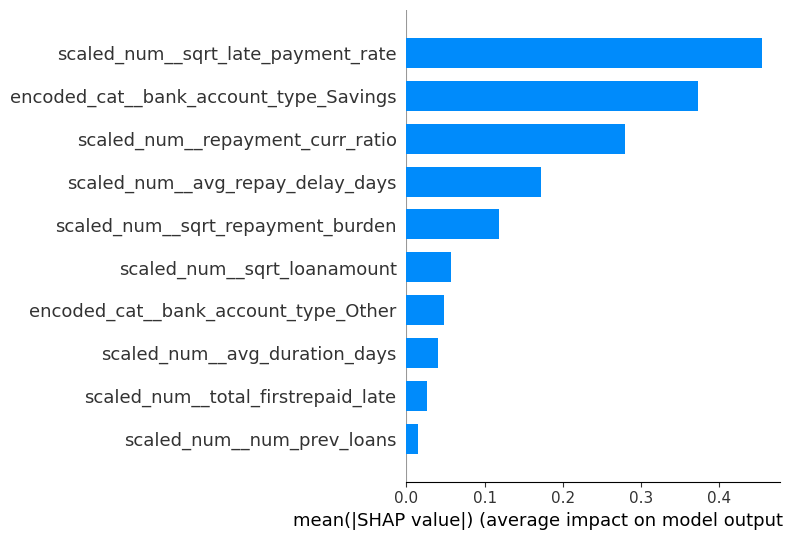

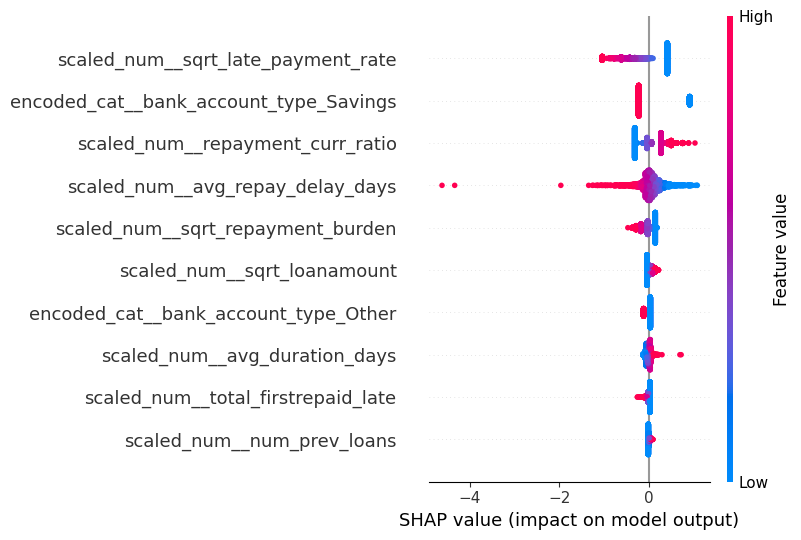

In [207]:
# Plots
shap.summary_plot(shap_values, X_train_processed_df, plot_type="bar")
shap.summary_plot(shap_values, X_train_processed_df)

### HYPERPARAMETER TUNING

In [208]:
from sklearn.model_selection import StratifiedKFold


FINAL HYPERPARAMETER TUNING - LOGISTIC REGRESSION (SMOTE + Balanced Weight)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Logistic Regression_Tuned_Classification Report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.38      0.53      0.44       142
           1       0.85      0.76      0.81       511

    accuracy                           0.71       653
   macro avg       0.62      0.65      0.62       653
weighted avg       0.75      0.71      0.73       653


Results for LogisticRegression_Tuned:
Train Accuracy: 0.7323
Test Accuracy: 0.7121
Precision Score: 0.8534
Recall Score: 0.7632
F1 Score: 0.8058
ROC AUC: 0.7068

All Results Table:
                          Train Accuracy  Test Accuracy  Precision Score  \
LogisticRegression_Tuned        0.732286       0.712098         0.853392   

                          Recall Score  F1 Score   ROC AUC  
LogisticRegression_Tuned      0.763209  0.805785  0.706844  

Logistics_

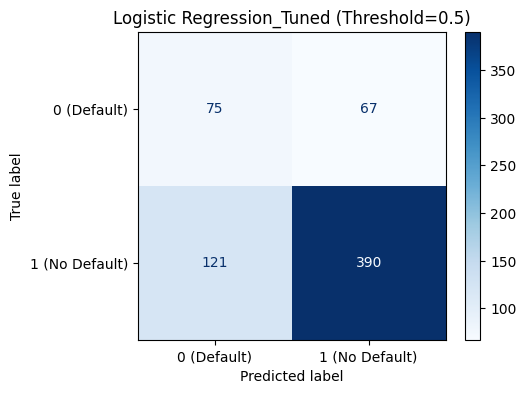


ROC AUC: 0.7068


In [209]:

# STRATIFIED CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("FINAL HYPERPARAMETER TUNING - LOGISTIC REGRESSION (SMOTE + Balanced Weight)")
print("=" * 75)

# PIPELINE
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),   
    ('smote', SMOTE(random_state=42)),
    ('select', SelectKBest(score_func=f_classif, k=15)),
    ('classifier', LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced'))
])

# PARAMETER GRID
lr_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__l1_ratio': [0.15, 0.5, 0.7]  # only works with elasticnet + saga
}

# GRID SEARCH (optimize recall)
lr_grid = GridSearchCV(
    lr_pipeline, lr_params,
    cv=skf,
    scoring={'f1':'f1','recall':'recall','precision':'precision','roc_auc':'roc_auc'},
    refit='recall',   # prioritize catching defaults
    n_jobs=-1, verbose=1
)

# Fit
lr_grid.fit(X_train, y_train)

# Best model
best_lr_model = lr_grid.best_estimator_


#FINAL EVALUATION 
results = {}
name = "LogisticRegression_Tuned"

# Predictions
train_pred = best_lr_model.predict(X_train)
test_pred = best_lr_model.predict(X_test)
y_proba = best_lr_model.predict_proba(X_test)[:, 1]

# Metrics
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Save results
results[name] = {
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "Precision Score": precision,
    "Recall Score": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc
}

#  CLASSIFICATION REPORT 
print("\nLogistic Regression_Tuned_Classification Report (threshold=0.5):")
print(classification_report(y_test, test_pred))

# PRINT RESULTS 
print(f"\nResults for {name}:")
for metric, value in results[name].items():
    if value is not None:
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}: None")
        
# Table
metrics_results = pd.DataFrame(results).T
print("\nAll Results Table:")
print(metrics_results)

#  CLASSIFICATION REPORT
print("\nLogistics_Regression Classification Report (threshold=0.5):")
print(classification_report(y_test, test_pred,target_names=['0 (Default)', '1 (No Default)']))

# CONFUSION MATRIX 
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0 (Default)', '1 (No Default)'])
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("Logistic Regression_Tuned (Threshold=0.5)")
plt.show()

#  ROC AUC 
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {roc_auc:.4f}")


After Tuning,the increase in TP(73 to 75) and decrease in FN(392 to 390) means 2 additional defaults are prevented, which is financially more significant. In credit risk, avoiding defaults usually outweighs losing a few good customers, so this trade-off is beneficial overall.There was also an improvement in the recall for default class(0) which means more defaulters would be caught.


## EXPORTING MODEL FOR DEPLOYMENT

In [210]:
best_model = best_lr_model

In [211]:
best_model.fit(X,y)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaled_num', ...), ('encoded_cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [212]:
import joblib 
joblib.dump(best_model,'loan_default.pkl')

['loan_default.pkl']

In [213]:
# Load the saved Model
model = joblib.load("loan_default.pkl")

In [214]:
model

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaled_num', ...), ('encoded_cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
